# Sentiment Analysis on Twitters Tweets

In [1]:
# Install required 
#!pip  install tweepy --user
#!pip install nltk --user

# Import Required Libraries

Here we have to import all the required library to perform data processing and sentiment analysis.

In [2]:
# Import required Libraries

from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import pos_tag
from nltk import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import wordnet, stopwords 
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hiral\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hiral\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hiral\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Import the dataset into workspace

We read dataset using the pd.read_csv command, since the dataset is a csv file and then I print the first 10 lines of the dataset using head().
Here’s how it looks like,

In [3]:
# Retrive data from csv file
tweet =  pd.read_csv('TweetList.csv')
tweet.head(10) # Display first 10 records using head()

,Datetime,Tweet Id,Text,Username,Numbers of Retweet,Numbers of Likes
0,2022-06-10 17:32:02+00:00,1.54E+18,RT @CryptoTownEU: 🚀 Airdrop: AstraProtocol\n💰 ...,Rahele51570382,4107,0
1,2022-06-10 17:32:02+00:00,1.54E+18,RT @OmaxToken: @BitcoinMagazine Time to swap y...,GeetikaAMS,7,0
2,2022-06-10 17:32:00+00:00,1.54E+18,📈Biggest #Cryptocurrency Gainers (among top 10...,CurrencyRush,0,0
3,2022-06-10 17:31:59+00:00,1.54E+18,RT @PlatanasoToken: Our Certik KYC is complete...,ec5f30a331cc464,3,0
4,2022-06-10 17:31:59+00:00,1.54E+18,10-12 Haziran tarihlerine günler önce dikkat ç...,MrEmreTrade,0,0
5,2022-06-10 17:32:32+00:00,1.54E+18,RT @MusicRev_io: #Music_Rev\n🔴 Buy on #Pinksal...,Flourien7,38,0
6,2022-06-10 17:32:32+00:00,1.54E+18,Update your software and antivirus protection ...,RematicEGC,0,0
7,2022-06-10 17:32:30+00:00,1.54E+18,RT @Saika_Samurai: ⭐️We are a real and success...,veldora_RBXS,15,0
8,2022-06-10 17:32:29+00:00,1.54E+18,Last #chance gem 💎 in #KuCoin \n\n#Crypto #cr...,Mjcooin,0,0
9,2022-06-10 17:32:27+00:00,1.54E+18,RT @Xstar_D: It isn't too late to claim your s...,draven_4252,1,0


#  Get the size, attibutes datatype, null values and duplicate samples of Dataset

#        1. Get the number of rows and columns: 
   
      The shape attribute of pandas.DataFrame stores the number of rows and columns as a tuple (number of rows, number of columns).      

In [4]:
# Check the numbers of rows and columns
print("\n\033[1mShape of the Dataset: \033[0m", tweet.shape)


Shape of the Dataset:  (9676, 6)


#        2. Check the datatype of all the attribute of Dataset: 

    The dtypes attribute of pandas.DataFrame used to display the datatypes of the all attributes of the dataset.


In [5]:
# Display datatypes of all Attributes using dtypes
print("\n\033[1mCheck datatype of all Features:\033[0m\n\n", tweet.dtypes)


Check datatype of all Features:

 Datetime              object
Tweet Id              object
Text                  object
Username              object
Numbers of Retweet    object
Numbers of Likes      object
dtype: object


In [6]:
# Convert Test attributes datatype object to String
tweet['Text'] = tweet['Text'].astype('string')
print("\n\033[1mCheck again Text attribute's datatype is change to string :\033[0m\n\n", tweet.dtypes)


Check again Text attribute's datatype is change to string :

 Datetime              object
Tweet Id              object
Text                  string
Username              object
Numbers of Retweet    object
Numbers of Likes      object
dtype: object


# 3.  Find and remove duplicate rows of Datset:

    Use duplicated() and drop_duplicates() to find, extract, count and remove duplicate rows from pandas.DataFrame.

In [7]:
# Count duplicate Records of dataset
print("\n\033[1m Numbers of duplicate Samples:\033[0m", tweet.duplicated().sum())


 Numbers of duplicate Samples: 750


In [8]:
# Remove duplicates records
tweet.drop_duplicates(inplace = True)

# Check again dataset has still duplicate Records
print("\n\033[1m Count again numbers of duplicate Samples:\033[0m", tweet.duplicated().sum())

# Check how many samples has dataset after removing duplicates records
print("\n\033[1m Shape of the Dataset: \033[0m", tweet.shape)


 Count again numbers of duplicate Samples: 0

 Shape of the Dataset:  (8926, 6)


# 4.  Find and remove null values of Datset:

    Use isnull() to find null values from pandas.DataFrame.

In [9]:
tweet.isnull().sum()

Datetime              0
Tweet Id              0
Text                  0
Username              0
Numbers of Retweet    0
Numbers of Likes      0
dtype: int64

## Data Pre-Processing

In NLP projects, the most important part is preprocessing the data, so that it is ready for a model to use. That’s what we are doing now. Since there are a lot of unnecessary words and text in the dataset, lets extract and store the input  and the output.
     
   To remove unnecessary words, I am going to use the following techniques:
    
   1. Removing RT/Emojis, numbers and casing characters
    
   2. Removing Punctuation
   
   3. Tokenization 
   
   4. Lemmatization

   5. Removing Stop Words 

# Removing RT/Emojis, numbers and casing characters

Remove RT, digits and Converting character to the same case so the same words are recognised as the same.

In [10]:
#Cleaning Text (RT, Punctuation. Emojis etc)

# Import re library for Regression Expression
import re

#Creating new dataframe and new features
tw_list = tweet

#Removing RT, Numbers and Emojis etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["CleanedText"] = tw_list.Text.map(remove_rt).map(rt)
tw_list["CleanedText"] = tw_list.CleanedText.str.lower() 
tw_list["CleanedText"] = tw_list.CleanedText.str.replace('\d+', '') 
tw_list.head(5)

C:\Users\hiral\AppData\Local\Temp\ipykernel_13672\701136273.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  tw_list["CleanedText"] = tw_list.CleanedText.str.replace('\d+', '')


,Datetime,Tweet Id,Text,Username,Numbers of Retweet,Numbers of Likes,CleanedText
0,2022-06-10 17:32:02+00:00,1.54E+18,RT @CryptoTownEU: 🚀 Airdrop: AstraProtocol 💰 V...,Rahele51570382,4107,0,airdrop astraprotocol value referr...
1,2022-06-10 17:32:02+00:00,1.54E+18,RT @OmaxToken: @BitcoinMagazine Time to swap y...,GeetikaAMS,7,0,time to swap your banks to cryptocurrency ...
2,2022-06-10 17:32:00+00:00,1.54E+18,📈Biggest #Cryptocurrency Gainers (among top 10...,CurrencyRush,0,0,biggest cryptocurrency gainers among top c...
3,2022-06-10 17:31:59+00:00,1.54E+18,RT @PlatanasoToken: Our Certik KYC is complete...,ec5f30a331cc464,3,0,our certik kyc is completed and is now posted...
4,2022-06-10 17:31:59+00:00,1.54E+18,10-12 Haziran tarihlerine günler önce dikkat ç...,MrEmreTrade,0,0,haziran tarihlerine g nler nce dikkat ekmi...


In [11]:
tw_list[["Text", "CleanedText"]].head(5)

,Text,CleanedText
0,RT @CryptoTownEU: 🚀 Airdrop: AstraProtocol 💰 V...,airdrop astraprotocol value referr...
1,RT @OmaxToken: @BitcoinMagazine Time to swap y...,time to swap your banks to cryptocurrency ...
2,📈Biggest #Cryptocurrency Gainers (among top 10...,biggest cryptocurrency gainers among top c...
3,RT @PlatanasoToken: Our Certik KYC is complete...,our certik kyc is completed and is now posted...
4,10-12 Haziran tarihlerine günler önce dikkat ç...,haziran tarihlerine g nler nce dikkat ekmi...


# Removing Punctuation

‘,.*!’ and other punctuation marks that are not really needed by the model.

In [12]:
# Import string library
import string

#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['CleanedText'].apply(lambda x: remove_punct(x))
tw_list[["Text", "punct"]].head(12)

,Text,punct
0,RT @CryptoTownEU: 🚀 Airdrop: AstraProtocol 💰 V...,airdrop astraprotocol value referr...
1,RT @OmaxToken: @BitcoinMagazine Time to swap y...,time to swap your banks to cryptocurrency ...
2,📈Biggest #Cryptocurrency Gainers (among top 10...,biggest cryptocurrency gainers among top c...
3,RT @PlatanasoToken: Our Certik KYC is complete...,our certik kyc is completed and is now posted...
4,10-12 Haziran tarihlerine günler önce dikkat ç...,haziran tarihlerine g nler nce dikkat ekmi...
5,RT @MusicRev_io: #Music_Rev 🔴 Buy on #Pinksale...,music rev buy on pinksale defi passi...
6,Update your software and antivirus protection ...,update your software and antivirus protection ...
7,RT @Saika_Samurai: ⭐️We are a real and success...,we are a real and successful team in the w...
8,Last #chance gem 💎 in #KuCoin #Crypto #cryp...,last chance gem in kucoin crypto cryp...
9,RT @Xstar_D: It isn't too late to claim your s...,it isn t too late to claim your spot in the ...


# Tokenization 
Tokenization is breaking the raw text into small chunks. Tokenization breaks the raw text into words, sentences called tokens. These tokens help in understanding the context or developing the model for the NLP. The tokenization helps in interpreting the meaning of the text by analyzing the sequence of the words.

Python has a native tokenizer, the .split() function, which you can pass a separator and it will split the string that the function is called on that separator. The NLTK tokenizer is more robust. It tokenizes a sentence into words and punctuation

In [13]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [14]:
tw_list[["Text", "tokenized"]].head()

,Text,tokenized
0,RT @CryptoTownEU: 🚀 Airdrop: AstraProtocol 💰 V...,"[, airdrop, astraprotocol, value, referral, ne..."
1,RT @OmaxToken: @BitcoinMagazine Time to swap y...,"[, time, to, swap, your, banks, to, cryptocurr..."
2,📈Biggest #Cryptocurrency Gainers (among top 10...,"[, biggest, cryptocurrency, gainers, among, to..."
3,RT @PlatanasoToken: Our Certik KYC is complete...,"[, our, certik, kyc, is, completed, and, is, n..."
4,10-12 Haziran tarihlerine günler önce dikkat ç...,"[, haziran, tarihlerine, g, nler, nce, dikkat,..."


# Parts of Speech (POS) Tagging
Parts of speech tagging simply refers to assigning parts of speech to individual words in a sentence, which means that, unlike phrase matching, which is performed at the sentence or multi-word level, parts of speech tagging is performed at the token level.

In [15]:
# POS tagger dictionary with whole dataset

pos_dict = {'J':nltk.corpus.wordnet.ADJ, 'V':nltk.corpus.wordnet.VERB, 'N':nltk.corpus.wordnet.NOUN, 'R':nltk.corpus.wordnet.ADV}
def token_stop_pos(text):  
    
# token_stop_pos is the function that takes the text and performs tokenization, removes stopwords, 
# and tags the words to their POS.

    tags = pos_tag(word_tokenize(text))
    newlist = []
    
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

In [16]:
tw_list['POS_Tagged'] = tw_list['CleanedText'].apply(token_stop_pos)
tw_list[["CleanedText", "POS_Tagged"]].head(5) 

,CleanedText,POS_Tagged
0,airdrop astraprotocol value referr...,"[(airdrop, n), (astraprotocol, v), (value, n),..."
1,time to swap your banks to cryptocurrency ...,"[(time, n), (swap, v), (banks, n), (cryptocurr..."
2,biggest cryptocurrency gainers among top c...,"[(biggest, a), (cryptocurrency, n), (gainers, ..."
3,our certik kyc is completed and is now posted...,"[(certik, n), (kyc, n), (completed, v), (poste..."
4,haziran tarihlerine g nler nce dikkat ekmi...,"[(haziran, n), (tarihlerine, n), (g, n), (nler..."


# Lemmatization 

This process finds the base or dictionary form of the word known as the lemma. This is done through the use of vocabulary (dictionary importance of words) and morphological analysis (word structure and grammar relations). This normalization is similar to stemming but takes into account the context of the word.

In [17]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    #"""Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = lemmatizer.lemmatize(word, pos=get_wordnet_pos(word))
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

In [18]:
tw_list['Lemma'] = tw_list["POS_Tagged"].apply(lemmatize)
tw_list["Lemma"]= tw_list.Lemma.str.replace(",", "")

In [19]:
tw_list[['CleanedText', 'Lemma']].head(10)

,CleanedText,Lemma
0,airdrop astraprotocol value referr...,airdrop astraprotocol value referral news ya...
1,time to swap your banks to cryptocurrency ...,time swap bank cryptocurrency omax btc bnb
2,biggest cryptocurrency gainers among top c...,big cryptocurrency gainer among top coin las...
3,our certik kyc is completed and is now posted...,certik kyc complete post website visit websi...
4,haziran tarihlerine g nler nce dikkat ekmi...,haziran tarihlerine g nler nce dikkat ekmi t...
5,music rev buy on pinksale defi passi...,music rev buy pinksale defi passiveincome bt...
6,update your software and antivirus protection ...,update software antivirus protection regular...
7,we are a real and successful team in the w...,real successful team world cryptocurrency un...
8,last chance gem in kucoin crypto cryp...,last chance gem kucoin crypto cryptocurrency...
9,it isn t too late to claim your spot in the ...,late claim spot marvin project marvininu eve...


# Removing Stop Words

Basically words like this, an, a, the, etc that do not affect the meaning of the tweet.

In [20]:
stopword = stopwords.words('english')
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [57]:
#Removing stopwords

newStopWords = ['amp', 'aa', 'aaa', 'aaaaaaaaand','aaaaaaaahfuckyessimhypedleggoikn','aaatrade', 'aantasten', 'aapko', 'aapl', 'aar', 'aarts','aate', 'aayega', 'ab', 'abbv', 'abby', 'abd', 'abis', 'abl', 'abnb', 'abou', 'abp', 'abra', 'abraha', 'absorb', 'absorber', 'ac', 'acad','acadexnetwork', 'accoun', 'acc', 'achi', 'achr', 'aclx', 'acm', 'acmr','acst', 'acuerdan','acva', 'ad', 'ada', 'adaggbtswytd',
'adausdt', 'adecu', 'adet', 'adm', 'adma', 'admp', 'ado', 'adop', 'adquir', 'adr', 'adresine', 'adscoin', 'adsense','adsexchange', 'adsl', 'aduana', 'aecom', 'aegischem', 'aep', 'aerc', 'aes', 'aespa', 'af', 'afectar','affiliatemarketing',  'afforda', 'afgelopen', 'afggeqtsl', 'afrm', 'ag', 'agai', 'age', 'aggiungeranno', 'aggr', 'agi', 'agiletherapeutics', 
'agiospharmaceuticals', 'agnico', 'agotar', 'agregan', 'agricul', 'agrobiod', 'agrx', 'aiday',  'aik', 'aioda', 'aiow', 'aitken', 'aiutato', 'aiuto', 'aix', 'aj', 'aja', 'ak', 'aka', 'akan', 'akba', 'ako', 'aktie', 'aktx', 'aku', 'alb', 'ald', 'algs', 'alibabagroupholding', 'alks', 'alla', 'alleen', 'alles', 'alm', 'almad', 'almayan', 'alna', 'alta', 'alya', 
'alyacare', 'alyaf', 'alyafinance', 'alyatoken', 'alyattes', 'alyssa', 'aman', 'amani', 'amarnath', 'amarnathji', 'amast', 'amat', 'amberheardcommittedperjury', 'ambik', 'amc','amcr', 'amctothemoon', 'amd', 'amediting', 'amenazan', 'amerikkka', 'ameriprise', 'amgn', 'amiqjcrtsl', 'amlogic','amo','amplio', 'amtran', 'amzn', 'anadoluyakasi', 'analistas', 'anantnag', 
'ancrypto', 'andr', 'andreesen', 'andy', 'angeles', 'angi', 'angliniv', 'angriff', 'anla', 'ann', 'announcem', 'announcemen', 'anot', 'anuncio', 'anyt', 'apa', 'apabila', 'apalagi', 'aparta', 'apatikane', 'apd', 'apecoin', 'apesnotleaving', 'api', 'aplikasi', 'aplo', 'apls', 'apph', 'appel', 'appli', 'appn', 'appro', 'aprender', 'aproveitando', 'apy', 'aquagoat', 'ar', 
'aramco', 'aramizda', 'arbutusbiopharma', 'arcellx', 'archieneko', 'arcobaleno', 'arct', 'arends', 'arey', 'arif', 'ariva', 'arivawonderland', 'ark', 'arkan', 'arkf', 'arkg', 'arkk', 'arkq', 'arkw', 'armageddon', 'armes', 'armie', 'armstrong', 'arnaud', 'aro', 'aroon', 'aroun', 'arqt', 'arr', 'arriv', 'arrr', 'arsalan', 'artdigital', 'artificialintelligence', 'artik', 
'arv', 'arvala', 'asalnya', 'asf', 'ashallnotbeinfringed', 'ashu', 'ashubagri', 'asid', 'askruhez','asktraders', 'asml', 'asr', 'assumi', 'astec', 'astr', 'astraprotocol', 'astro', 'astroad', 'asus', 'atanlar', 'atau', 'atenci', 'atifaslam', 'atl', 'atlanta', 'atlastrading', 'atp', 'attracti',   'atv',  'aufregen', 'aug','augustine', 'aumentar', 'aumento', 'austin', 
'autostaking', 'autozone', 'av', 'ava', 'avai', 'availabl', 'availbe', 'avais', 'avalanc', 'avalanche', 'avalara', 'avalia', 'avaliada', 'avantaj', 'avax', 'ave', 'avec', 'aver', 'avera', 'averag', 'average', 'averaging', 'avg', 'aviso', 'avitacard', 'avitacoin', 'avitaecosystem', 'avitalifestyle', 'avitalifetime', 'avitanft', 'avitatoken', 'avitawallet', 'avlr', 'avoid',
'avoigt', 'avoir', 'avpt', 'avrupayakasi', 'avxl', 'awa', 'axdx', 'axgn', 'axie', 'axion', 'axp', 'ay', 'ayenge', 'ayo', 'aytu', 'ayudar', 'az', 'azad', 'azadqad', 'azo', 'azul', 'azulsa','aaple', 'abus', 'acciones', 'accusa', 'acordo', 'actifit', 'adam', 'advant', 'advetise', 'afghanistan', 'africa', 'african', 'afridi', 'aggresssive', 'ahousewife', 'ahread', 'airbnbs', 
'airdropstario', 'airware', 'Akin', 'Al', 'Ala', 'Alan', 'Alcista', 'Alex', 'alexander', 'alkermes', 'Alle', 'Allen', 'Alr', 'Alt', 'Altcoin', 'altcoins', 'altcoinseason', 'altruism', 'Alum', 'alumnus', 'alway', 'Ama', 'amazinggg', 'amazone', 'americana', 'ammo', 'Amp', 'amrita', 'Ana', 'anal', 'Analiz', 'Analiza', 'Analize', 'Analyse', 'Analysisweekend', 'Analysten', 
'Ang', 'Ani', 'Anil', 'anticipat', 'Ap', 'apar', 'Ape', 'appliedmaterials', 'awal','ba', 'bab', 'baba', 'baby', 'babydoge', 'babydogearmy', 'babydogecoin', 'babydogefamily', 'babydogemetaverse', 'babydogewallet', 'babyf', 'bacdaily',  'backstag', 'bagi', 'bagri', 'bah', 'baja', 'bajajfinance''bajfinance', 'bak','bal', 'balaji','balkon', 'bandex', 'bandipora', 'bandwagon', 
'banggood', 'bangtan','banknifty','bantu', 'bantuan', 'banyak', 'baozun', 'bapes', 'barang',  'barron', 'baru', 'bauschhealthcompanies', 'bawah', 'bawal', 'bax', 'bayar', 'bayc', 'bazinga', 'bb', 'bba', 'bbb', 'bbig', 'bbm', 'bbvxf', 'bbw', 'bc', 'bcbnf', 'bcg', 'bch', 'bcuz', 'bdrl', 'bdsx' 'beanrdavid','bearis', 'bearmarket', 'bebas', 'bec', 'beca', 'beco',  'beeing', 'bef',
'befirst', 'befo', 'begg',  'bei', 'beija', 'beijing', 'beklenti', 'beklentinin', 'belarus', 'beli', 'belii', 'belirtilmi', 'belum', 'bem', 'beml', 'bemoe', 'beneficiar', 'bener', 'bengkel', 'benifit', 'benioff', 'bennett', 'benzersiz', 'benzinga', 'ber', 'berbahan', 'berisikan','berkleybearnews', 'berlegenem', 'berminat', 'bermuda', 'bernie', 'bersegel', 'bertajuk', 'bertanya',
'besides', 'besok', 'betwee', 'bex', 'bexplus', 'beyonc', 'beyondprotocol', 'beyondspring', 'beyonduniversfr', 'bezoge', 'bezos', 'bfly', 'bfs', 'bg', 'bgc', 'bgfv', 'bgness', 'bgt', 'bhai','bharat', 'bhasha', 'bhatia', 'bhatnakar', 'bhc', 'bhp', 'bhpgroup','bhvn', 'bi', 'biafrans','biasa', 'biasanya', 'biden', 'bideneconomy', 'bidenflation', 'bidenisafailure', 'bidens', 'bidu', 'bie',
'bigbaba', 'bigoil', 'bil', 'bila', 'bilbao', 'bili', 'billgates', 'billi', 'billio', 'billionairecat', 'billy', 'bim', 'bimi', 'binance', 'binancesmartcha', 'binancesmartchain', 
'binaryoptions', 'bindel', 'bingx', 'biohavenpharmaceuticalholding', 'bir', 'biri', 'birle', 'bisa','biscui', 'bist', 'bitbrother', 'bitc', 'bitcasin', 'bitcasino', 'bitcoincash', 'bitcoincrash', 'bitcoinist', 'bitcoinnews', 'bitcoinprice', 'bitcoinpump','bitf', 'bitfinex', 'bitgert', 'bitkan', 'bitmart', 'bittere', 'bittrex', 'bitvavo', 'bizassetinsights', 'bjd', 'bk', 'bkex', 'bkng', 
'bksy', 'bl','bryan', 'bryyf', 'bsc', 'bscg', 'bscge', 'bscgem', 'bscgems', 'bscscan','bse','bsv', 'bsx', 'bt', 'btb', 'btc', 'btcb', 'btcbusd', 'btcs', 'btcusd', 'btcusdt', 'btdg', 'btfa', 'btig', 'btm', 'btma', 'btomgtsl', 'bts', 'btw', 'btx', 'bu', 'buat', 'buddyhead', 'buffett', 'bugbount', 'buka', 'bukan', 'bukele', 'bul', 'bulle', 'bullet', 'bullgold', 'bullgoldgemasx', 'bullrun', 
'bulunmaktay', 'bulustu', 'burasi', 'burman', 'burnshib', 'buscador', 'busd', 'busienss','busin', 'busines',  'businessnews', 'buteri', 'buterin', 'butthis', 'buyi', 'buythedip', 'bvb', 'bw', 'bybit', 'byd', 'byddy', 'byfc', 'bynd', 'bypass', 'byrne', 'bysi', 'bajajfinance', 'bajar', 'bajfinance', 'bdsx', 'beanrdavid', 'Bikin', 'Bla', 'Blac', 'blackchully', 'blackpearlconsultancyph', 
'blackzen', 'blasphemy', 'blatantly', 'Blb', 'Ble', 'blitzwolf', 'Blm', 'Bln', 'Blo', 'bloatware', 'Bloc', 'blockch', 'Blockcha', 'blockchaintechnology', 'blockware', 'bloomberg', 'Blte', 'Blu', 'bluetooth', 'Blzusdt', 'Bmt', 'Bmw', 'Bn', 'Bnb', 'Bnbchain', 'Bnbusdt', 'Bntx', 'Bnw', 'Bo', 'bobchapek', 'bobok', 'boc', 'bod', 'Bodes', 'Bogle', 'Bogor', 'Boi', 'Boleh', 'bollinger', 'booksale', 
'boostx', 'boredape', 'boris', 'borr', 'borrdrilling', 'borsa', 'bos', 'bosonic', 'bostonbeer', 'botlar', 'botu', 'boun', 'boxl', 'boy', 'ca', 'cacc', 'cacmid', 'cada', 'cadore', 'cae', 'calcular', 'calum', 'calyxt', 'camaro', 'canada', 'canadian', 'cannabiscommunity', 'capit', 'capital', 'capitalisation', 'capitalizi', 'capitaltrader', 'capr', 'capricortherapeutics',
'carda', 'cardano', 'cardanoada', 'cardanocommunity', 'cardanofeed', 'cardanonfts', 'cari', 'caribbean', 'caro', 'carrd', 'cartesi', 'carv', 'carverban', 'carypto', 'cascadia', 'casi', 'casino', 'cassper', 'castro', 'catalini', 'catalonia', 'catcoin', 'cathie', 'catsf', 'causando', 'cause', 'cawthorn', 'cboe', 'cc', 'cci', 'ccl', 'ccount', 'ccxi', 'cd', 'cdak', 'ce', 'cea', 'cei', 'ceiling',
'cek', 'celdas', 'celldextherapeutics', 'celsius', 'celtic', 'celui', 'cement', 'cen', 'cenov', 'ceo', 'ceramide', 'cerrar', 'certa', 'certik', 'cex', 'cf', 'cfa', 'cffbddefd', 'cfp', 'cfx', 'cgc', 'cgtn', 'ch', 'cha', 'chahiy', 'chahiye', 'chan', 'chandra', 'changehr', 'characterises','charbon', 'chargepoint', 'chargez', 'charit', 'charles', 'charlie', 'chartminer', 'che', 'cheate', 'chec',
'cheems', 'cheemsarmy', 'cheemsinu', 'cheermatesnothate', 'chega', 'chemi', 'chen', 'chevrolet', 'chez', 'chg', 'chiangmai', 'chil', 'china', 'chinese', 'chipotlerestaurant', 'chkp', 'chongqing', 'chorein', 'chpt', 'chris', 'christian', 'christmas', 'chromebook', 'chrw', 'cia', 'ciale', 'ciankkk', 'cient', 'cierran', 'cierre', 'cihan', 'cindy', 'cinu', 'cio', 'cir', 'citi', 'citigroup', 'citiz',
'ckb', 'clat', 'clb', 'cldx', 'cleannft', 'clearkan', 'climatechange', 'climatechanges', 'climatecrisis', 'clls', 'cloudflare', 'clr', 'clusterbuying', 'clvs', 'clxt', 'clyde', 'cm', 'cma', 'cmc', 'cmct', 'cme', 'cmg', 'cmmb', 'cmove', 'cmp', 'cmsenergy', 'cn', 'cnbc', 'cnbcview', 'cnft', 'cnftgiveaway', 'cnhi', 'ck', 'cl', 'cnhindustrial', 'cnn', 'cnq', 'cnr', 'cns', 'cntx', 'cnx', 'cnxenergy',
'cnxfmcg', 'cnxit', 'cnxmedia', 'cnxmetal', 'cnxpharma', 'co', 'cobalt', 'coc', 'cod', 'codx', 'cody', 'coffe', 'cogt', 'coinba', 'coinbase', 'coincheckup', 'coingecko', 'coinhuntworld', 'coinma', 'coinmarketcap', 'coinquora', 'coinsbit', 'cointelegraph', 'cointoday', 'coinviewcap', 'cok', 'colegiales', 'coleman', 'collectio', 'colombia', 'coloque', 'combad', 'comingsoon', 'comm', 'commen',
'campo','comenz', 'commenc', 'commer', 'como', 'comp', 'compan', 'companiyon', 'companyformation', 'companysecretary', 'compens', 'competi', 'compra', 'compren', 'compresor', 'comput', 'comstockresources', 'con', 'conduc', 'configurado', 'conhecedores', 'connectorcoin', 'conor', 'consi', 'conspiracytheory', 'construcci', 'consultar', 'contacten', 'contamos', 'contarian', 'contemplates', 'contemporaryart', 
'contributio', 'conve', 'conven', 'convinently', 'corp', 'corr', 'correlared', 'cosied', 'cost', 'coti', 'cotton', 'cou', 'coughlin', 'coul', 'cour', 'covfefe', 'coz', 'cp', 'Cpb', 'Cpg', 'Cpi', 'cpop', 'Cr', 'Cra', 'cramer', 'cras', 'crashe', 'crashi', 'crbu', 'crea', 'creat', 'creatingthenergyfuture', 'crge', 'cripto', 'criptomoneda', 'cris', 'crisprtherapeuticsag', 'crk', 'crkn', 'crm', 'cro', 'crofam', 
'cron', 'crosschain', 'crouley', 'crowdfunding', 'crpf', 'crsp', 'crsr', 'cruceros', 'crudeoil', 'cruz', 'cruzando', 'crwd', 'cry', 'cryp', 'cryptoadoption', 'cryptoart', 'cryptoartist', 'Cryptobarons', 'Cryptobots', 'Cryptoc', 'Cryptocoins', 'Cryptocom', 'cryptocommunity', 'Cryptocrash', 'cryptocrunchapp', 'Cryptocu', 'Cryptocur', 'Cryptocurr', 'Cryptocurre', 'Cryptocurren', 'cryptocurrenc', 
'cryptodomains', 'Cryptofunny', 'Cryptogaming', 'cryptographiques', 'Cryptohome', 'Cryptohours', 'cryptoinvestment', 'cryptoinvestor', 'Cryptoloans', 'Cryptomarket', 'Cryptomeme', 'cryptomemes', 'Cryptomining', 'Cryptone', 'Cryptonews', 'Cryptonoob', 'cryptopayments', 'cryptoperhour', 'Cryptoreview', 'Cryptoshorts', 'Cryptoslate', 'Cryptoswarm', 'Cryptotra', 'cryptotrader', 'cryptotrading', 'cryptotwitter', 
'cryptowire', 'cryptowithndtv', 'cryptoworld', 'crypyo', 'crystal', 'csco', 'csiq', 'csjbmtsl', 'csl', 'cst', 'ct', 'ctco', 'cto', 'ctrlaltstock', 'ctsi', 'ctvnews', 'ctx', 'cu', 'cuando', 'cuckquean', 'cue', 'cuentas', 'culas', 'cultarmy', 'cultdao', 'cuma', 'cunt', 'cup', 'cupsleeve', 'curah', 'curr', 'curry', 'curva', 'customerexperience', 'customiz', 'cuz', 'cv', 'cvc', 'cvet', 'cvna', 'cvrpartners', 
'cvx', 'cybavo', 'cyber', 'cybercriminals', 'cyberquad', 'cybertruck', 'cyborgsunite', 'cyclerion', 'cycn', 'cypherdog', 'cyrptoexchange', 'cz', 'da', 'daalde', 'daftar', 'dah', 'daha', 'dailybusiness', 'daki', 'dal', 'dalam', 'dallas', 'dam', 'dame', 'dammit', 'damzn', 'dan', 'dang', 'danidata', 'danidatafraud', 'dank', 'dann', 'dans', 'dao', 'daos', 'dapat', 'dapet', 'darp', 'darryl', 'das', 'dat', 
'dave', 'daver', 'davido', 'daytrader', 'daytrading', 'dbc', 'dbytltsl', 'dc', 'dca', 'dce', 'dcg', 'dcn', 'dcns', 'dcnstudio', 'dcr', 'dd', 'dddd', 'de', 'deace', 'dealabs', 'dealdocuments', 'deathcab', 'deathxpony', 'debe', 'debristsl', 'december', 'decentralise', 'decentralizedtrading', 'decisiones', 'declaraci', 'decre', 'deepika', 'deere', 'deese', 'def', 'defamation', 'defence', 'defi', 'deficere', 
'definews', 'definitivamente', 'defiyield', 'defo', 'deh', 'dekat', 'del', 'delek', 'deloitte', 'delorean', 'demain', 'deman', 'demol', 'dems', 'den', 'dena', 'dengan', 'departamentos', 'depe', 'depend', 'depende', 'deposuna', 'depres', 'Der', 'derbyshire', 'derfor', 'derin', 'desabastecimento', 'desarrollo', 'descargas', 'descendente', 'descrip', 'description', 'descubrieron', 'descuento', 'desde', 'deseamos', 
'desgracia', 'despencam', 'despues', 'destek', 'detai', 'detail', 'detailed', 'detaylar', 'determi', 'dev', 'devalue', 'devam', 'devem', 'devenez', 'devs', 'dex', 'dexacoin', 'dexbot', 'dexchange', 'dexg', 'dexgam', 'dexgame', 'dexido', 'dexp', 'dextools', 'dexversus', 'dey', 'dffn', 'dfs', 'dg', 'dgb', 'dgi', 'dgica', 'dgly', 'dgp', 'dhr', 'di', 'dia', 'dialer', 'diario', 'diaspora', 'dibawah', 'dicos', 'didi', 
'didn’t', 'diesen', 'differenza', 'digibyte', 'digifinex', 'digitalally', 'digitalart', 'digitalassets', 'digitalcurrencies', 'digitalmarketing', 'digitalmoney', 'digitalpayments', 'digitaltwins', 'dii', 'dijeron', 'dikkat', 'dildo', 'diligence', 'dilute', 'dimana', 'dime', 'dimon', 'dine', 'dinosaur', 'dinu', 'dip', 'dipped', 'dir', 'dire', 'directa', 'directo', 'diretor', 'dirt', 'dis', 'disapointing', 'discoverfinancialservices', 
'discus', 'disiplinin', 'disisi', 'diskusi', 'disney', 'dispar', 'dispara', 'display', 'dispo', 'disrupt', 'dissident', 'dista', 'distr', 'distribuci', 'distruptive', 'dit', 'diunggah', 'dive', 'diversify', 'divs', 'diyen', 'diz', 'dji', 'djia', 'dk', 'dlt', 'dltr', 'dm', 'dma', 'dmt', 'dn', 'doc', 'docu', 'docusig', 'docusigninc', 'doesnt', 'doge', 'dogeco', 'dogecoin', 'dogecointothemoon', 'dogepalooza', 'dogfish', 
'doggedly', 'dogshit', 'doin', 'dojo', 'dojoswap', 'dokwon', 'dom', 'domainname', 'domainsforsale', 'donald', 'donat', 'donde', 'donegal', 'dong', 'donne', 'dont', 'dontbuythedip', 'doo', 'doob', 'dorsey', 'dotdown', 'dotz', 'dou', 'doubler', 'dovish', 'dow', 'dowjones', 'dowjonesindustrial', 'downlo', 'dp', 'dr', 'draf', 'draft', 'drag', 'drakor', 'dropdead', 'drts', 'drug', 'druh', 'drunk', 'drv', 'dry', 
'dryp', 'dt', 'dtcc', 'du', 'dubai', 'duckyworld', 'duction', 'dudebros', 'due', 'duh', 'duhhr', 'duka', 'dulu', 'dumbass', 'dumble', 'dumbledao', 'dumbledoa', 'dunno', 'dunyasini', 'duol', 'duolingo', 'duraci', 'durante', 'durrrrrr', 'durumu', 'dutt', 'duymadinizmi', 'duymayan', 'dvax', 'dvn', 'dwac', 'dxgm', 'dxy', 'dydx', 'dystopia', 'ea', 'eas', 'easyjet', 'ebeano', 'ebg', 'ebit', 'ec', 'ecash', 'ecb', 'echain', 
'echt', 'ecl', 'eco', 'ecol', 'econ', 'econom', 'economia', 'ecopetrol', 'ed', 'edah', 'eddy', 'eder', 'edgeswitch', 'edildi', 'edilmektedir', 'edinburg', 'ediyor', 'edsa', 'edt', 'edu', 'ee', 'eff', 'effe', 'efoi', 'efx', 'egld', 'eh', 'ehehe', 'eine', 'einen', 'einstien', 'ek', 'ekili', 'ekle', 'eklenip', 'ekmi', 'ekonomi', 'ekosistem', 'el', 'elan', 'elawn', 'eld', 'ele', 'elect', 'electri', 'eleons', 'eletrobras', 
'eleva', 'eli', 'elitist', 'elizabeth', 'elli', 'elliottwave', 'ellipal', 'elo', 'elon', 'elongoat', 'elonm', 'elonmu', 'elonmusk', 'elonmuskbuytwitter', 'elonmuskbuyyoutube', 'elonmuskstock', 'elonmusktwitter', 'elonone', 'elons', 'elonsproblems', 'elro', 'elsalvador', 'elwe', 'elxsi', 'em', 'embr', 'emini', 'emli', 'emma', 'emn', 'emp', 'emperor', 'empl', 'empresa', 'empresarios', 'emtia', 'en', 'ena', 'enc', 
'encerram', 'encima', 'encontramos', 'encuentre', 'enerev', 'enero', 'enfacare', 'enfamil', 'enflasyon', 'eng', 'engamers', 'engga', 'enhypen', 'enjoyin', 'ent', 'entegrasyonu', 'enternft', 'enterpris', 'entershillgang', 'entr', 'entrep', 'entrepren', 'ents', 'entx', 'env', 'envb', 'envoie', 'eon', 'eone', 'ep', 'epdi', 'epiccash', 'eps', 'epstein', 'eqt', 'equi', 'er', 'erc', 'erf', 'eric', 'ericcaldwell', 'erken', 
'erli', 'ern', 'erp', 'ersten', 'es', 'esas', 'esg', 'esgotas', 'eso', 'espa', 'esperando', 'espl', 'espor', 'esports', 'esq', 'esse', 'est', 'esta', 'estaban', 'estado', 'estados', 'este', 'esto', 'et', 'etc', 'etf', 'eth', 'ethe', 'ether', 'ethere', 'ethereum', 'ethereummax', 'ethereumnfts', 'etherium', 'etherum', 'ethi', 'ethmerge', 'ethshib', 'ethshibfam', 'ethusd', 'ethusdt', 'etkisin', 'etoro', 'etrade', 'eu', 
'eua', 'eunchan', 'euro', 'euroapi', 'eurusd', 'eux', 'ev', 'everbridge', 'everearn', 'everrevoke', 'everrise', 'everriseedu', 'everriseinu', 'everrisen', 'everrisenft', 'everrisev', 'everswap', 'everythi', 'evesinde', 'evi', 'evreni', 'evstocks', 'façade', 'fais', 'faisait', 'falter', 'fam', 'fanart', 'fanbois', 'fansfun', 'fantomian', 'farage', 'farfetch', 'fark', 'farner', 'fascist', 'faso', 'fatto', 'favorit', 'favourite', 
'fb', 'fcel', 'fcuv', 'fcx', 'fd', 'fda', 'fdi', 'fdus', 'fe', 'febru', 'fed', 'feelgoodfriday', 'ferna', 'fet', 'feud', 'fficer', 'fgw', 'fhn', 'fi', 'ficos', 'fifa', 'figurin', 'fih', 'fii', 'fiis', 'fil', 'fin', 'fina', 'finan', 'financebubble', 'financefeeds', 'financia', 'financialadvisor', 'financialplanning', 'finpl', 'finswap', 'fintech', 'fintwit', 'fique', 'fireants', 'fis', 'fisco', 'fite', 'fitness', 'fitscrypt', 'fiverr', 
'fjb', 'fk', 'flamemetaverse', 'flamshoot', 'flarenation', 'fliks', 'flm', 'floki', 'flopp', 'flor', 'flr', 'flujos', 'flyingggg', 'flyw', 'fmg', 'fmtx', 'fnac', 'fngd', 'fnsp', 'fo', 'follo', 'followi', 'fomo', 'fomoland', 'fondo', 'fonunda', 'foolcomau', 'forexsignals', 'forextrader', 'formul', 'formula', 'formusic', 'foto', 'fotoo', 'fotovoltaico', 'foxbusiness', 'fp', 'fr', 'fracas', 'freebitcoin', 'freebtc', 'freecrudeoiltip', 
'freecrudeoiltips', 'freecurrencytips', 'freee', 'freeksn', 'freemint', 'freemintnft', 'freenifty', 'freetip', 'freetips', 'freevipquote', 'fremtiden', 'frens', 'frente', 'freut', 'frey', 'fri', 'frida', 'fridaymorning', 'fridayvibes', 'fritz', 'fro', 'frog', 'froggiefriday', 'fron', 'frucking', 'frzss', 'fsc', 'fsd', 'fsdbeta', 'fsk', 'fsr', 'ft', 'ftc', 'fti', 'ftm', 'ftnt', 'ftsm', 'ftv', 'ftx', 'ftxn', 'fu', 'fuckton', 'fud', 
'fuecked', 'fuerte', 'fuga', 'fugitive', 'fugly', 'fui', 'fuking', 'funko', 'funkopop', 'funnier',  'funnygameworld', 'fursuitfriday', 'futbol', 'futurestrading', 'fuv', 'fvrr', 'fwd', 'fwiw', 'fx', 'fxi', 'fxrumble', 'fxs', 'fy', 'fyi', 'ga', 'gaak', 'gaat', 'gael', 'gaetz', 'gagne', 'gagner', 'gainz', 'gaiss', 'gak', 'gal', 'galactic', 'galaxyblitz', 'gambar', 'gamefi', 'gamestop', 'gamfi', 'gantun', 'garantizado', 'garanto', 'gateio', 
'gatesshorts', 'gav', 'gayi', 'gaz', 'gaza', 'gb', 'gbp', 'gc', 'gd', 'gddr', 'gdp', 'gdrtoken', 'gdrx', 'gdx', 'ge', 'gearous', 'gecirdik', 'geforce', 'geh', 'geiger', 'gelen', 'gelismis', 'gelmektedir', 'gemas', 'gen', 'generar', 'generatio', 'genshin', 'gensler', 'genui', 'genuine', 'genuinel', 'genz', 'ger', 'gerdau', 'gerek', 'germany', 'gert', 'gesara', 'gesti', 'gform', 'gg', 'ggu', 'gh', 'ghc', 'gia', 'gica', 'gidiyo', 
'gif', 'gij', 'gillmore', 'gitu', 'givea', 'giveawayalert', 'gkk', 'glenn', 'glmr', 'globalhive', 'globenewswire', 'glxt', 'gm', 'gmailhack', 'gme', 'gmt', 'gn', 'gng', 'gnyx', 'goev', 'gogl', 'gohome', 'goin', 'goldenbea', 'goldenoceangroup', 'goldmansachsgroup', 'goldprice', 'goldstandardventures', 'gon', 'goo', 'goode', 'goofy', 'goog', 'googl', 'googleearth', 'googlestock', 'goopass', 'gop', 'gopay', 'gordon', 'gordonjohnson', 
'gotrade', 'gov', 'govt', 'gpd', 'gpi', 'gpu', 'gr', 'graell', 'grandes', 'grandisimo', 'graphene', 'grasimindustries', 'gratuito', 'gre', 'greatcorrection', 'greenbay', 'greencrypto', 'grimegorrila', 'grogu', 'grom', 'grootste', 'grossistes', 'grovegreenarmy', 'grovetoken', 'growthstocks', 'grwg', 'gsv', 'gt', 'gtb', 'gtf', 'gtii', 'gtx', 'guarda', 'gue', 'guise', 'gujaratgas', 'gun', 'guo', 'guru', 'gustan', 'guthrie', 'gvr', 
'gww', 'gxe', 'gyan', 'gziggy', 'gzil', 'ha', 'hab', 'hablando', 'hacer', 'hackett', 'hackingtime', 'haha', 'hahaha', 'hai', 'hain', 'hal', 'hala', 'halladorenergy', 'halland', 'halliburton', 'halo', 'haloo', 'halve', 'hamburg', 'hamilton', 'han', 'hanbin', 'hande', 'handeercel', 'handfan', 'hap', 'happenin', 'hardik', 'hareketlili', 'harga', 'hargany', 'hari', 'harika', 'harold', 'hartjen', 'hasan', 'hascometo', 'hasent', 
'hasskick', 'hateet', 'hatersgonna', 'hathor', 'hav', 'hawkish', 'hay', 'hayabusa', 'haziran', 'hcp', 'hd', 'hdb', 'hdo', 'headcount', 'headley', 'headlight', 'headlin', 'healthineers', 'heartwarmin', 'hedefleyen', 'hedgefund', 'hedgeweek', 'hedgeye', 'heechul', 'hefty', 'hehehe', 'hellish', 'hellogroup', 'hellomrcaptain', 'helpppppp', 'hem', 'hemisph', 'hemorrhage', 'hepsiburada', 'herberth', 'hertfordshire', 'hess', 'heute', 
'hexo', 'heyk', 'hf', 'hibs', 'hii', 'hiii', 'himalaya', 'hin', 'hindu', 'hingga', 'hinterhof', 'hiphop', 'hiryu', 'hitam', 'hive', 'hlj', 'hmm', 'hmmmmm', 'hmmmmmm', 'hmove', 'hmtxf', 'hmy', 'hnrg', 'ho', 'hobi', 'hocam', 'hoddie', 'hodler', 'hokk', 'hola', 'holdi', 'holtom', 'holy', 'holyfvck', 'homedecor', 'homesale', 'homestyling', 'hominem', 'hon', 'hop', 'hopef', 'hora', 'horario', 'horatio', 'hornblower', 'hoshi', 'hoskinson', 
'hous', 'househunting', 'housingcrisis', 'hoy', 'hqx', 'hr', 'hrgnya', 'hrow', 'hsy', 'ht', 'htr', 'htt', 'http', 'huacheng', 'hughes', 'huh', 'hum', 'humanise', 'humanpotential', 'humanquant', 'hun', 'hunch', 'hunde', 'hundredtonmantis', 'huntella', 'huntington', 'huobi', 'huobitoken', 'hurricane', 'huya', 'huyundai', 'hybe', 'hybrid', 'hycroft', 'hydn', 'hydration', 'hyg', 'hymc', 'hyperledger', 'hypermove', 'hypocritical', 
'hypothekenbank', 'ia', 'iag', 'ian', 'iayari', 'ibb', 'ibookstore', 'ibovespa', 'ibrx', 'icarus', 'ich', 'icicibank', 'ico', 'icono', 'icpt', 'id', 'idemo', 'ideo', 'idex', 'idgaf', 'idioma', 'idn', 'ido', 'idoso', 'idr', 'idrk', 'idupu', 'idxx', 'ieo', 'iexec', 'ifugao', 'ig', 'ihc', 'iheartmedia', 'ihre', 'ihs', 'ihsg', 'iipr', 'iirc', 'iivi', 'iki', 'ikna', 'iko', 'ikokazike', 'ikutan', 'il', 'ile', 'ilerinden', 'ilk', 
'ill', 'illegals', 'illiquid', 'illumina', 'illus', 'ilmn', 'ilovegalaxyblitz', 'im', 'ima', 'imab', 'imbi', 'imdi', 'imediabrands', 'imf', 'imho', 'imma', 'immer', 'immp', 'immutep', 'imo', 'ina', 'inadvertida', 'inbox', 'inc', 'incapable', 'incels', 'incentivizes', 'incest', 'incluido', 'incredibles', 'incubator', 'ind', 'indepe', 'indi','indiansharemarket', 'indianstocktraders', 'indic', 'indica', 'indicat', 'indicato', 'indictment', 
'indie', 'indique', 'indmoney', 'indones', 'indonesia', 'indulge', 'indust', 'industrialenergy', 'inf', 'infi', 'infl', 'inflaci', 'inflared', 'inflat', 'inflati','inflazione', 'infobae', 'informace', 'infosys', 'ing', 'ingl', 'ingreso', 'ini', 'inii', 'inked', 'inko', 'innit', 'inofficial', 'inondertwitterdecoccinelles', 'insi', 'insiderbuying', 'insidertrade', 'insidertrading', 'insta', 'instagram', 'instal', 'insurer', 'int', 'intc', 
'interaday', 'intere', 'interestrates', 'interiordesign', 'intewesting', 'intradaytips', 'intro', 'intu', 'inu', 'inv', 'invade', 'inval', 'invasion', 'inve', 'inversi', 'inversionista', 'inverte', 'inves', 'investidores', 'investimentobrasil', 'investimentoexterior', 'investimentosbrasileexterior', 'investin', 'investingtips', 'investme', 'investmen', 'investorplace', 'investorsk', 'invests', 'invierte', 'io', 'iol', 'iot', 'iota', 'iova', 
'ip', 'ipo', 'ipob', 'ipwr', 'iq', 'iqiyi', 'ir', 'ira', 'ireland', 'irgendwelche', 'irm', 'irnt', 'ironie', 'irr', 'irrespe', 'irs', 'isback', 'isee', 'ish', 'isi', 'islamicoin', 'islix', 'isnt', 'israel', 'isrg', 'isso', 'ist', 'isun', 'isx', 'italia',  'itc', 'itch', 'ithinksoproject', 'itimler', 'itmedia', 'ittycheria', 'itu', 'itzy', 'iva', 'ivanka', 'ivv', 'iwas', 'iwd', 'iwm', 'iyi', 'iykyk', 'jacobe', 'jadi', 'jaehyun', 'jahren', 'jai',
'jailbreak', 'jaisi', 'jajan', 'jaket', 'jamais', 'james', 'jamie', 'jammu', 'jamna', 'jan', 'jana', 'janet', 'jangan', 'janury', 'jared', 'jasmy', 'jason', 'jaspan', 'jati', 'javali', 'javascript', 'jawan', 'jay', 'jaypea', 'jayz', 'jblu', 'jci', 'jd', 'je', 'jeb', 'jeff', 'jegs', 'jenner', 'jenny', 'jeno', 'jeonghan', 'jeopardizing', 'jerome', 'jersey', 'jeru', 'jesus', 'jfrey', 'jg', 'jgn', 'jika', 'jim', 'jimcramer', 'jimmy', 'jmd', 'jnk', 
'jo', 'joe', 'joey', 'john', 'johnny', 'jonathan', 'jones', 'jonesy', 'jordannovet', 'joseph', 'joshua', 'jota', 'jou', 'jovito', 'joy', 'joyce', 'jp', 'jpg', 'jpm', 'jpmorgan', 'jpy', 'jr', 'jsem', 'jsmc', 'jsw', 'jt', 'jtbk', 'ju', 'jual', 'jualan', 'jubilarse', 'judge', 'judging', 'jufeng', 'juga', 'jul', 'julian', 'julio',  'jumla', 'jun',  'jungkook', 'juni', 'junio', 'juno', 'junto', 'jurisdiction', 'juros', 'jus', 'justiceforactman', 
'justiss', 'justlisted', 'jwn', 'jyp', 'ka', 'kaboompics', 'kabuki', 'kadang', 'kahotel', 'kaj', 'kak', 'kalian', 'kalila', 'kaliteli', 'kalkinemediacomau', 'kalmayacak', 'kalo', 'kamu', 'kan', 'kanan', 'kang', 'kann', 'kano', 'kapasiteleri', 'kappa', 'karac', 'karachi', 'karen', 'kariak', 'kariakoo', 'karina', 'karkus', 'karma', 'karyopharm', 'kasariblockchain', 'kasih', 'katacak', 'kathleen', 'kathua', 'kathy', 'katze', 'kazanacagimiz', 'kazananlar', 
'kazanc', 'kazanmak', 'kazuha', 'kda', 'ke', 'kee', 'kehabisan', 'kellogg', 'kemarin', 'kemmel', 'ken', 'kendala', 'kennedy', 'kenneth', 'kenworth', 'kenya', 'keon', 'kerem', 'kerfuffle', 'kering', 'kes', 'kesel', 'ketersediaan', 'keycha', 'keyr', 'kgc', 'khaleej', 'khojinindia', 'khouw', 'khushiyan', 'khusus', 'ki', 'kibum', 'kickstarter', 'kienyeji', 'killuvathu', 'kim', 'kimme', 'kinda', 'kingd', 'kingdata', 'kingston', 'kinnpo', 'kiri', 'kissan', 
'kita', 'kkr', 'klac', 'kladko', 'klanan', 'kland', 'klardan', 'kleenex', 'klesnout', 'kleverchain', 'klse', 'km', 'kmerch', 'kmi', 'knc', 'kncusdt', 'kndi', 'knowi', 'knowledg', 'knowledge', 'knownews', 'ko', 'kobo', 'koch', 'kohler', 'kohlersdmo', 'koleksi', 'kommenden', 'kommt', 'kompletter', 'konami', 'kondisi', 'kong', 'konjak', 'konsi', 'konusunda', 'koro', 'kosher', 'kplt', 'kpop', 'kpti', 'kr', 'kracko', 'kraken', 'kre', 'kripto', 'kriptopara', 
'kris', 'krisis', 'kromer', 'krssmanagement', 'ksek', 'ksh', 'ksn', 'ksnairdrop', 'ksntoken', 'kt', 'kten', 'kucoin', 'kudlow', 'kudos', 'kulgam', 'kullan', 'kuraca', 'kurt', 'kusama', 'kushner', 'kusikuy', 'kw', 'kwon', 'kya', 'kyburz', 'kyc', 'kyiv', 'kyuyoung', 'kyypreorders', 'la', 'labd', 'labo', 'lado', 'lady', 'lagi', 'lagos', 'lagosfridaylondonmonday', 'lagta', 'lake', 'lakh', 'lan', 'lance', 'langley', 'lanjut', 'lanka', 'lanzan', 'lar', 'lares', 
'larry', 'las', 'lash', 'lasvegassands', 'latin', 'latino', 'latoken', 'laun', 'lava', 'lawi', 'lawrence', 'layla', 'laylay', 'layo', 'lazr', 'lbo', 'lbrt', 'lcid', 'le', 'lea', 'leamer', 'leanne', 'lear', 'learnerx', 'learns', 'lebih', 'leclerc', 'legalservices', 'legendsofbezogia', 'lem', 'lemonn', 'lena', 'lennon', 'leo', 'leot', 'lere', 'letsgobrandon', 'lette', 'levine', 'lewis', 'lewk', 'leyton', 'lfg', 'lfin', 'lg', 'lgbt', 'lgbtq', 'lgsg', 'lgu', 
'lh', 'li', 'lian', 'liat', 'libertyenergy', 'libs', 'libya', 'lic', 'lichsgfin', 'licy', 'liderando', 'lifesciences', 'lighstick', 'liiiiii', 'lik', 'lil', 'lilac', 'lilack', 'lili', 'lillyfinance', 'lillytoken', 'limi', 'limocoin', 'lin', 'linea', 'linin', 'linkedin', 'linkt', 'linkte', 'linktree', 'liq', 'liqas', 'liqu', 'liquida', 'liquidiation', 'lista', 'listenearn', 'litecoin', 'litepaper', 'litera', 'liu', 'liv', 'liverankingsbyvolume', 'livermore', 
'liversnkingsbymarketcap', 'livr', 'liyor', 'ljxuejftsl', 'lkm', 'llc', 'lly', 'lm', 'lmao', 'lmaoo', 'lmfaoo', 'lmt', 'lng', 'lo', 'locro', 'log', 'logarithmic', 'logotipo', 'lol', 'london', 'longo', 'longs', 'longtermvision', 'loo', 'loocchh', 'looksrare', 'loom', 'lope', 'lore', 'los', 'loses', 'losi', 'lostword', 'lot', 'lotz', 'louisiana', 'lowstock', 'lpcn', 'lptx', 'lqd', 'lsf', 'lsk', 'lt', 'ltc', 'ltcusd', 'ltcusdt', 'ltd', 'ltima', 'lto', 'lucidair', 
'lucidcoin', 'lucrati', 'lucu', 'luego', 'lui', 'lulu', 'lummis', 'lun', 'luna', 'lunaburn', 'lunaclassicburn', 'lunarcrush', 'lunarflare', 'lunatic', 'lunc', 'luncarmy', 'luncburn', 'luncdao', 'lunes', 'luxe', 'luxon', 'luxury', 'lvs', 'ly', 'lyft', 'lyle', 'lyowallet', 'maar', 'mac', 'macbeth', 'macd', 'maceh', 'machen', 'machiato', 'machinelearning', 'macready', 'madame', 'madhapur', 'madison', 'madrid', 'mag', 'magazine', 'magia', 'magn', 'magnetgold', 'magnitogorsk', 
'mainnet', 'maintai', 'maintenant', 'maior', 'mais', 'maj', 'mak', 'makati', 'makau', 'makeuseof', 'maki', 'makine', 'maksimum', 'mal', 'malaysia', 'malaysiamarket', 'malem', 'malgr', 'mama', 'mana', 'mandalorian', 'mandox', 'manejo', 'manera', 'maneuver', 'manga', 'mangle', 'maniac', 'manja', 'mansueto', 'manuplation', 'mar', 'marcio', 'maret', 'mariposa', 'marka', 'marke', 'marketcrash', 'marketmove', 'marketnews', 'marketupdate', 'marketwatch', 
'marktwaarde', 'marmaray', 'martha', 'marv', 'marvellous', 'marvin', 'marvinauts', 'marvininu', 'marx', 'mascot', 'masih', 'masiva', 'maslon', 'mastercard', 'masterinvestor', 'materiales', 'matic', 'matthew', 'mau', 'mauduit', 'mauu', 'maxar', 'maxpain', 'maxr', 'mayor', 'mayweather', 'mbb', 'mc', 'mcalindon', 'mcap', 'mcd', 'mchi', 'mcqueary', 'mcx', 'md', 'mdb', 'mdlz', 'mdmstctsl', 'mdrx', 'meandao', 'mec', 'mechs', 'mecool', 'mede', 'medicaid', 'mediowa', 
'medtwitter', 'meen', 'mehdi', 'mehr', 'meilleure', 'mejora', 'mejores', 'meka', 'meli', 'melling', 'membuat', 'memecoin', 'memesan', 'meminta', 'memoryusang', 'menayangkan', 'mendag', 'mendapatkan', 'menos', 'mera', 'mercado', 'mercatox', 'merch', 'mercuryretrograde', 'mereka', 'meri', 'merkmal', 'mesh', 'metahash', 'metaking', 'metales', 'metamask', 'metano', 'metaone', 'metaple', 'metaplefinance', 'metarix', 'metaruffy', 'metashop', 'metaver', 'metavers', 
'metaverse', 'metaversegym', 'metaverseprojec', 'metaverses', 'metaverso', 'metersbiopharma', 'metfx', 'metho', 'metis', 'metric', 'meus', 'mex', 'mexc', 'mexican', 'mf', 'mfinance', 'mfx', 'mgtx', 'mi', 'mic', 'michael', 'michaelhugh', 'michel', 'micro', 'microcap', 'microloan', 'micron', 'microso', 'microsoft', 'mict', 'midas', 'midatechpharma', 'middle', 'middleman', 'midget', 'midium', 'midlife', 'midol', 'migh', 'migliorare', 'migor', 'mikeb', 'milan', 
'milestoken', 'millionair', 'millones', 'milo', 'mineros', 'minervini', 'minosis', 'minta', 'miota', 'mir', 'miraeassetmutualfunds', 'mit', 'mitexstream', 'miui', 'mixt', 'mizark', 'mksd', 'mkt', 'ml', 'mlm', 'mlx', 'mm', 'mmat', 'mmemberville', 'mmk', 'mmm', 'mn', 'mo', 'moa', 'mob', 'mobi', 'mobil', 'moderati', 'moderna', 'modi', 'moins', 'mois', 'moisturizer', 'molibdenos', 'moltjtsl', 'molymet', 'mom', 'mome', 'momento', 'momentu', 'momo', 'mon', 
'mona', 'monarch', 'monde', 'mone', 'monedas', 'monero', 'moneygram', 'mongodb', 'mont', 'montale', 'montana', 'moodboard', 'moore', 'morethannft', 'morgan', 'morganstanley', 'morn', 'morningstar', 'moron', 'motocorp', 'motos', 'moumou', 'movimento', 'mp', 'mpc', 'mr', 'mrin', 'mrk', 'mrna', 'mro', 'mrsblackzen', 'msft', 'msh', 'msnbc', 'msp', 'msrp', 'msrs', 'mstr', 'mtc', 'mtdr', 'mteja', 'mtg', 'mtp', 'mttr', 'mu', 'muchacho', 'muchas', 'mucho', 'mugwort', 
'muhabbeti', 'muhte', 'mulk', 'muln', 'multibagger', 'multifinance', 'mulu', 'mumbai', 'mumpung', 'muna', 'munawallet', 'munaz', 'mundo', 'munro', 'muo', 'muppets', 'murray', 'murrow', 'musicnft', 'musika', 'musin', 'muu', 'mvb', 'mwn', 'mxbox', 'mybitstore', 'mylove', 'myners', 'na', 'naala', 'nabs', 'naes', 'nagpapamudmod', 'nah', 'nahi', 'nairobi', 'nak', 'nakamoto', 'nala', 'nalaa', 'nam', 'nanthealth', 'naoto', 'napa', 'nasda', 'nasdaq', 'nasdaqtslan', 
'nasentauchen', 'nassr', 'natauri', 'nationalworld', 'nationsleague', 'naturalgas', 'naus', 'navalny', 'naveed', 'navkarcorp', 'nayeon', 'naysayer', 'nazi', 'nb', 'nba', 'nbev', 'nce', 'nceden', 'ncelleme', 'ncna', 'ncr', 'nct', 'nd', 'nda', 'ndan', 'nde', 'nderebilirsini', 'ndice', 'ndices', 'ndole', 'ndx', 'ne', 'nearusdt', 'neas', 'nebati', 'nec', 'necesitas', 'nee', 'nefes', 'negara', 'neko', 'nem', 'nemde', 'nemyslel', 'nept', 'neptunewellnesssolutions', 'nerd', 
'nerve', 'nervosa', 'nervosnetwork', 'nesara', 'nesta', 'netflex', 'netflix', 'neticesi', 'neuropro', 'neve', 'neverquit', 'nevertrump', 'newdrop', 'newshour', 'newyorkstockexchange', 'nex', 'nextplaytechnologies', 'nf', 'nfa', 'nfl', 'nflx', 'nft', 'nfta', 'nftart', 'nftarti', 'nftartist', 'nftartists', 'nftarts', 'nftbuyers', 'nftco', 'nftcollection', 'nftcollector', 'nftcollectors', 'nftcommm', 'nftcommmu', 'nftcommmunity', 'nftcommumity', 'nftcommunity', 'nftcommuntiy', 
'nftdrop', 'nftdrops', 'nftfamily', 'nftgiveaway', 'nftgiveaways', 'nftmarketplace', 'nftoftheday', 'nftproject', 'nfts', 'nftsales', 'nftsart', 'nftscam', 'nftspromoter', 'ng', 'ngapi', 'ngga', 'ngl', 'nglenergypartners', 'ngulo', 'nguyen', 'ngx', 'nh', 'nhi', 'nhtsa', 'ni', 'niacinamide', 'niaje', 'nica', 'nicht', 'nico', 'nie', 'niftybank', 'niftymetal', 'nigeria', 'nigga', 'nih', 'nihh', 'niii', 'nikakula', 'nikola', 'nimo', 'nintendo', 'nio', 'niomotors', 
'nisn', 'nisun', 'nk', 'nke', 'nkl', 'nl', 'nler', 'nleri', 'nmixx', 'nmr', 'nmtr', 'nner', 'nobi', 'nod', 'nodejs', 'nomad', 'non', 'nonton', 'noob', 'nooooooo', 'nordstorm', 'norwich', 'nosedive', 'nosti', 'nostradamus', 'notas', 'nothin', 'notif', 'notizie', 'noto', 'notre', 'nouveau', 'nouveaux', 'nov', 'novavax', 'november', 'novogratz', 'npr', 'nq', 'nrz', 'nsc', 'ntos', 'ntrs', 'nu', 'nuance', 'nue', 'nuestra', 'nuestro', 'nueva', 'nuevo', 'nuit', 'numbe', 
'numpang', 'nun', 'nuovo', 'nutra', 'nuvve', 'nuworld', 'nvax', 'nvda', 'nvidia', 'nvve', 'nxpi', 'nxpsemiconductors', 'nxtp', 'ny', 'nya', 'nyada', 'nyadaki', 'nyas', 'nyc', 'nyoung', 'nyse', 'nyt', 'nzd', 'oann', 'oara', 'oas', 'oasis', 'oathies', 'obgyn', 'obi', 'objetivo', 'obtener', 'obv', 'oc', 'ocgn', 'octob', 'october', 'od', 'odaviduvathu', 'odds', 'oe', 'oem', 'ofc', 'oferta', 'offici', 'offs', 'ofjuly', 'ofrecer', 'ofthis', 'og', 'ogun', 'oh', 'ohne', 'oi', 'oih', 
'oilandgas', 'oilprice', 'oilpricecom', 'oilpricewar', 'okaybears', 'okpoloko', 'ol', 'olaca', 'olacak', 'oleh', 'oli', 'olmas', 'olu', 'olumsuz', 'olun', 'olv', 'omax', 'omaxblockchain', 'omaxian', 'omaxians', 'omc', 'omg', 'omicro', 'omnibus', 'omnstsl', 'onavax', 'oncamera', 'oneui', 'ong', 'onglok', 'ongusdt', 'oni', 'onl', 'onlinebestellung', 'ont', 'onto', 'onurun', 'onxrp', 'oo', 'ooo', 'oooh', 'ooops', 'oopen', 'oops', 'oos', 'op', 'opec', 'opecmeeting', 'openforwork', 
'openlittermap', 'opensea', 'openseaart', 'openseanft', 'operaciones', 'opini', 'opne', 'opp', 'opportunit', 'optimizar', 'optionchain', 'optionsflow', 'optionstrade', 'optionstrading', 'optiontrading', 'orde', 'orderkan', 'oreal', 'org', 'ori', 'orly', 'ornstein', 'orrrr', 'ortaklar', 'ortam', 'oscillator', 'osi', 'osifsu', 'osimicity', 'ot', 'otc', 'otcmarkets', 'otcqb', 'oth', 'othe', 'others', 'otherw', 'othet', 'otomatik', 'otra', 'ou', 'outlaw', 'outsid', 'ouverture', 'ownersh', 
'owyoctsl', 'oxbr', 'oxbridgereholdings', 'oxro', 'oxy', 'oyun', 'oyunu', 'oznopop', 'pa', 'pac', 'pacb', 'pacificbiosciencesofcalifornia', 'pada', 'padahal', 'padfam', 'padtoeth', 'paga', 'pagar', 'pahalgam', 'paiements', 'paisa', 'pak', 'paketboten', 'paketi', 'pakianathan', 'pal', 'palantir', 'palau', 'pali', 'panama', 'pancakeswap', 'pandem', 'pandemia', 'papercup', 'paperwo', 'par', 'para', 'parah', 'parka', 'parody', 'parte', 'parter', 'particip', 'participa', 'participer', 'partn', 
'partne', 'partnerlik', 'partnerlikler', 'pas', 'pasadena', 'pasado', 'pasar', 'pasneysakaiaka', 'passar', 'passe', 'passiveinco', 'passiveincome', 'pastikan', 'pata', 'patien', 'patra', 'patreon', 'patrick', 'patrickhummel', 'paubos', 'paul', 'paulpierce', 'paw', 'paxg', 'paxo', 'paxton', 'payitforward', 'payment', 'paymentus', 'paypal', 'paytm', 'pb', 'pbt', 'pc', 'pci', 'pcr', 'pdac', 'pdd', 'pe', 'pedidos', 'peet', 'pegaming', 'pel', 'pele', 'pelosi', 'peloton', 'pemerintah', 
'penempatan', 'pengchuyue', 'penge', 'penhead', 'pennysearch', 'pennystock', 'pennystocks', 'penting', 'peo', 'peor', 'pep', 'per', 'perce', 'perdas', 'pere', 'perfil', 'perfo', 'performanceshipping', 'permanecer', 'permissionle', 'permite', 'permitira', 'pero', 'perp', 'persiste', 'personnes', 'pertamina', 'pesa', 'peso', 'pessimism', 'petit', 'petrobras', 'petronas', 'petroteq', 'petz', 'peut', 'pexels', 'peyronie', 'pezinho', 'pf', 'pfg', 'pfshare', 'pg', 'pgmp', 'pgr', 'ph', 'phev', 
'phi', 'philippot', 'phishing', 'phoenixknights', 'phoenixrising', 'phoenixweeklyupdate', 'photoedit', 'php', 'phut', 'phx', 'pi', 'pic', 'piconsensus', 'pict', 'pidi', 'pif', 'pinduoduo', 'pinetwork', 'pinksale', 'pinu', 'piratechain', 'pirs', 'piss', 'pivu', 'pixar', 'pixela', 'piyasa', 'piyasadaki', 'piyasas', 'piyasaya', 'pl', 'planb', 'platanaso', 'platf', 'platfor', 'platforma', 'playearn', 'playstation', 'playstore', 'playtoearn', 'playtoearngames', 'pleeeease', 'plis', 
'plod', 'ploy', 'pls', 'pltr', 'plummete', 'plush', 'plz', 'pm', 'pmr', 'png', 'pnw', 'po', 'pob', 'podemos', 'poder', 'poilasne', 'polido', 'politiche', 'politika', 'polkadot', 'polovin', 'polygon', 'polygonnft', 'pon', 'pondzi', 'pontzi', 'ponying', 'ponzi', 'pooch', 'popmusic', 'popped', 'populairste', 'populat', 'por', 'poradensk', 'porc', 'porque', 'porte', 'posit', 'postchat', 'potencial', 'pottenware', 'pourra', 'pov', 'powell', 'powere', 'poz', 'pp', 'ppbt', 'ppl', 'pq', 
'pqeff', 'pr', 'prawn', 'prax', 'praxis', 'prazo', 'pre', 'precio', 'precios', 'preciousmetals','precisar', 'prenait', 'preocupados', 'prep', 'pres', 'pressrelease', 'preto', 'prev', 'preventeza', 'previ', 'previe', 'previs', 'prevoient', 'pri', 'pric', 'pricedround', 'pridemonth', 'prin', 'prinz', 'priser', 'priva', 'probi', 'problemas', 'probly', 'prochaine', 'prodotti', 'productos', 'produits', 'produk', 'produkte', 'profi', 'profitabl', 'programa', 'proje', 'projec', 'projectcatalyst', 'projenin', 
'projesi', 'promotin', 'propri', 'proscenic', 'protential', 'proterra', 'proyecto', 'ps', 'psa', 'pse', 'pshg', 'psilocin', 'pssssst', 'pst', 'psychedelic', 'psychedelicart', 'psychedelicnft', 'pti', 'ptra', 'ptsd', 'pu', 'publi', 'publici', 'puchna', 'puede', 'pueden', 'puedes', 'puerto', 'pues', 'puigdemont', 'pukka', 'pul', 'pulinft', 'pulsech', 'pulsechain', 'pun', 'pundit', 'punto', 'puntos', 'purplle', 'putin', 'putshedging', 'pvc', 'pwc', 'px', 'pxd', 'pypl', 'pzm', 'qad', 'qcom', 
'qe', 'qlgn', 'qqq', 'qr', 'qris', 'qrkvfdzuwxygyydhfmsavnv', 'qt', 'qtum', 'qua', 'qualcomm', 'qualtricsinternational', 'quantit', 'quanto', 'quantumscape', 'que', 'queda', 'ques', 'questi', 'questio', 'qui', 'quicknotes', 'quicksand', 'quinas', 'qunty', 'quoteoftheday', 'qvc', 'ra', 'rabia', 'raca', 'racist', 'rad', 'radical', 'radiocaca', 'radioshack', 'radiusprotocol', 'raelt', 'raf', 'raha', 'rai', 'rainey', 'rajeev', 'rakeshjhunjhunwala', 'rakt', 'rale', 'ram', 'rama', 'rando', 
'randomfinancialterm', 'ranknstein', 'rater', 'rathbone', 'ratusan', 'ravivisvesvarayasharadaprasad', 'raysup', 'raz', 'rb', 'rbaycan', 'rbx', 'rbxs', 'rbxsa', 'rbxsam', 'rbxsamurai', 'rbxstoken', 'rcl', 'rd', 'rdbx', 'rea', 'readjust', 'reagan', 'reaganomics', 'realestate', 'realestateinvesting', 'realestatephodoedit', 'realiz', 'reallly', 'reas', 'rebaked', 'rec', 'recini', 'recolecci', 'recu', 'recuperaci', 'recuperar', 'redbox', 'reddcoin', 'redgo', 'redi', 'redimi', 'redu', 'referal', 
'referr', 'referra', 'regi', 'registeredinvestmetadvisory', 'registration', 'regn', 'regreso', 'regretf', 'regtech', 'regul', 'rei', 'reichsmark', 'reit', 'reject', 'rekenkracht', 'rela', 'relat', 'religio', 'remanente', 'remington', 'remot', 'rendahl', 'renege', 'renewablee', 'renmesi', 'renn', 'renren', 'rentar', 'reog', 'rep', 'repr', 'repres', 'represente', 'repuestos', 'req', 'researc', 'reservemunt', 'resmi', 'resse', 'resteghini', 'resultados', 'resumen', 'ret', 'retira', 'retirem', 
'returner', 'retw', 'retwteet', 'reuters', 'rev', 'reve', 'revelati', 'reveluvselcaday', 'reviens', 'revisa', 'revoltearn', 'reyke', 'rgb', 'rgmb', 'rhode', 'rholagos', 'rhythmpharmaceuticals', 'ri', 'ria', 'richmartians', 'rief', 'rig', 'rigg', 'rightstufanime', 'rinaldi', 'ringdoll', 'riot', 'ripcurl', 'risco', 'riseandgrind', 'risingsuncoin', 'rittenhouse', 'rivians', 'rivn', 'rixx', 'rke', 'rkt', 'rlc', 'rliqas', 'rly', 'rm', 'rmed', 'rn', 'rnrc', 'ro', 'robado', 'robaron', 'robisearch', 
'roblox', 'robostopia', 'rodriguez', 'roe', 'roevwade', 'roi', 'roket', 'roketci', 'roku', 'rollins', 'rom', 'ron', 'roobet', 'rookieinvestor', 'rop', 'ropst', 'ropsten', 'rosevear', 'ross', 'rost', 'rotharium', 'rothariumfood', 'routi', 'routinel', 'rowling', 'rowvwade', 'roy', 'royalcaribbeangroup', 'royalraffle', 'rozer', 'rp', 'rpa', 'rpc', 'rrp', 'rsi', 'rsr', 'rsrusdt', 'rt', 'rts', 'rtx', 'ru', 'ruaka', 'ruffy', 'ruiz', 'runned', 'ruzzian', 'rvlt', 'rvn', 'rvsd', 'rvtivptsl', 'ryan', 
'ryfr', 'ryoshi', 'rytm', 'sa', 'saapiduvathu', 'saat', 'saatlik', 'sabar', 'sabatoge', 'saben', 'saberstager', 'sabotage', 'sacaron', 'sachs', 'sack', 'sacred', 'safemoon', 'safemoonarmy', 'safran', 'sagen', 'sai', 'sail', 'saita', 'saitama', 'saitamallc', 'saitamatoken', 'saitamauk', 'saitamav', 'saitamawolfpack', 'saitapro', 'sal', 'sala', 'salame', 'salir', 'salonga', 'salvador', 'sam', 'samantha', 'sampe', 'samsung', 'samurai', 'san', 'sandler', 'sanem', 'sanjy', 'santa', 'saranin', 
'sat', 'sath', 'satoshi', 'satoshistreetbets', 'satoshiswap', 'saturday', 'saturn', 'saudades', 'saudi', 'saya', 'saylor', 'sc', 'scgibc', 'schmuck', 'schon', 'schoolfight', 'schreib', 'schw', 'schwab', 'schweitzer', 'sci', 'scor', 'scorefam', 'scoups', 'sd', 'sdmo', 'sdow', 'sdram', 'se', 'seana', 'sebab', 'sebas', 'secur', 'secvsripple', 'seeamless', 'segurar', 'seine', 'seinem', 'sekilde', 'selalu', 'selectr', 'selectrucks', 'selfdrivingcars', 'selli', 'sellin', 'selloff', 'selva', 
'semana', 'semp', 'sempat', 'sempr', 'sen', 'sendin', 'sendiri', 'sends', 'senseth', 'sensex', 'sentado', 'seo', 'sepetember', 'ser', 'serai', 'seria', 'seungcheol', 'sft', 'sh', 'sha', 'shaame', 'shap', 'shareholde', 'shelby', 'shi', 'shib', 'shibari', 'shibarium', 'shibarmy', 'shikishi', 'shiller', 'shinkita', 'shinten', 'shiryo', 'shit', 'shitcoins', 'sho', 'shocki', 'shontay', 'shopindependentday', 'shoppin', 'shorters', 'showe', 'shv', 'shytoshi', 'sidak', 'sidepocket', 'siga', 'sigwo', 
'silahkan', 'silverprice', 'silvia', 'simi', 'singapore', 'singkat', 'sinir', 'sinkt', 'siva', 'siz', 'skal', 'skale', 'skaruppa', 'skeb', 'skeens', 'skidt', 'skintific', 'skt', 'slavespeciesofthegods', 'slovakia', 'slovakiya', 'sma', 'smallcaps', 'smartnews', 'smh', 'smhi', 'smith', 'snex', 'snl', 'snv', 'soalnya', 'sobem', 'sobre', 'soci', 'socialfi', 'socialmediamarketing', 'sof', 'sofi', 'softwa', 'sojka', 'sol', 'sola', 'solana', 'solanasummer', 'solarcity', 'solare', 'solarelectric', 
'solarenergy', 'solarinds', 'solarroof', 'solcial', 'sologenic', 'somone', 'sonn', 'sonnetbiotherapeuticsholdings', 'sono', 'soo', 'soooo', 'souhaitez', 'souhrn', 'sowore', 'spacefo', 'spacenavid', 'spaceshost', 'spacex', 'speciali', 'sphynxlabs', 'spl', 'spo', 'sportbetio', 'spotify', 'spreadlovenotfud', 'springworkstherapeutics', 'sq', 'sqqq', 'squeda', 'sre', 'srf', 'srga', 'sri', 'srty', 'st', 'sta', 'stadtbratzen', 'stakers', 'stakingr', 'stan', 'stanbul', 'standart', 'standee', 'standwithukraine', 
'stanky', 'stark', 'starpay', 'state', 'staunch', 'steem', 'steet', 'steigen', 'stfu', 'stigende', 'stoc', 'stochastic', 'stockact', 'stockexchange', 'stockmar', 'stockmark', 'stockmarket', 'stockmarketc', 'stockmarketin', 'stockmarketindia', 'stockmarketnews', 'stocksmarket', 'stocksplit', 'stockstowatch', 'stocktip', 'stocktowatch', 'stok', 'stonerfam', 'stonex', 'storkholders', 'stortford', 'strategx', 'stratejisti', 'straykids', 'stre', 'stresstest', 'stretegy', 'stuc', 'sua', 'subje', 'sucti', 
'summergamefest', 'sunderland', 'sunseting', 'sunucu', 'suo', 'suoi', 'supaya', 'supplyc', 'suppo', 'suppor', 'sur', 'sus', 'sustaini', 'swn', 'swold', 'swtx', 'sx', 'syopi', 'ta', 'taban', 'taillants', 'taire', 'tak', 'takhle', 'takip', 'taku', 'taliban', 'talkaboutcult', 'talknote', 'tamagotchi', 'tapi', 'tarjeta', 'tarjetas', 'tasky', 'tatapower', 'tavsiyeleri', 'taxation', 'taxpayer', 'tayfan', 'tbd', 'tcgworld', 'tdf', 'te', 'tec', 'technicalanalysis', 'tecnol', 'tecr', 'ted', 'teeter', 'tehehe', 
'tek', 'telah', 'telsa', 'teme', 'temen', 'tenemos', 'tengan', 'tengas', 'tengo', 'tengok', 'tepeden', 'teraexchange', 'terareum', 'terence', 'terjadi', 'terraclassic', 'terraform', 'terwijl', 'tesco', 'tesl', 'teslabu', 'teslainvestorsclub', 'teslanaires', 'teslaradar', 'teslast', 'teslastock', 'teslastocksplit', 'testea', 'testear', 'testnet', 'tether', 'teukchul', 'tex', 'texan', 'texasholdem', 'tezos', 'tezosart', 'tf', 'tg', 'tgcf', 'th', 'tha', 'thankieess', 'thats', 'thebeat', 'thedailyconsultant', 'thehellhound', 'thei', 
'theno', 'thestreet', 'theta', 'thi', 'thoma', 'thr', 'throug', 'thru', 'thumb', 'thursday', 'thx', 'ti', 'tia', 'ticari', 'ticwatch', 'tidak', 'tie', 'tiempo', 'tiene', 'tiens', 'tigr', 'til', 'tilbury', 'tim', 'timken', 'tipe', 'tirerek', 'tit', 'titulares', 'tl', 'tlsa', 'tm', 'tmc', 'tme', 'tmus', 'tnc', 'tngh', 'tnx', 'tod', 'toda', 'toke', 'tolonk', 'tom', 'tomar', 'topgainers', 'toplad', 'toploader', 'toplosers', 'topstories', 'topvolume', 'torno', 'toro', 'tp', 'tpi', 'tr', 'tra', 'trabaji', 'trabajo', 
'trad', 'traditionalart', 'trainor', 'tras', 'trb', 'trc', 'tre', 'tres', 'trevor', 'trex', 'trf', 'tri', 'triad', 'tricktrades', 'triggerme', 'trilemma', 'trinke', 'trinkerr', 'triplea', 'trole', 'tron', 'trovare', 'troy', 'tru', 'trubadger', 'trubgr', 'trustwallet', 'trv', 'trx', 'try', 'tryin', 'tryna', 'tryst', 'tsco', 'tsla', 'tslaq', 'ttc', 'tuckshop', 'tuem', 'tuf', 'tuppercontain', 'turmay', 'tuya', 'twe', 'twilio', 'twitch', 'twitterspace', 'twitterspaces', 'twlo', 'twtr', 'tymetechnologies', 'type', 
'typically', 'tyudatsl', 'uavs', 'uaw', 'ubs', 'ucuzdan', 'udah', 'udh', 'uec', 'uefa', 'ufc', 'ufpt', 'ug', 'ugh', 'ugl', 'uh', 'uhh', 'ui', 'uid', 'ujungnya', 'uk', 'ukra', 'ukraine', 'ullzang', 'ultenic', 'ultimatel', 'ultrabook', 'ultrade', 'ulzzang', 'um', 'uma', 'umumin', 'un', 'una', 'uncwjourno', 'und', 'underlie', 'une', 'unidos', 'uniquest', 'uniswap', 'unite', 'universum', 'unl', 'unterschied', 'untouchable', 'untuk', 'untung', 'upd', 'upfintechholding', 'uranus', 'usfr', 'usiache', 'usm', 'ust', 'usws', 'utc', 
'utilitie', 'utilitynft', 'uur', 'uvalde', 'uvc', 'uwmc', 'uygun', 'uyumu', 'vagner', 'vai', 'vaipathu', 'vais', 'vakit', 'valesa', 'valeur', 'valhalla', 'valiosa', 'valley', 'valorar', 'valu', 'vanga', 'vanguard', 'varice', 'vasil', 'vaultfinance', 'vaw', 'vc', 'vcp', 'vcs', 'vctr', 'vechain', 'vee', 'veedeeo', 'vehi', 'vel', 'vela', 'ven', 'vende', 'venezu', 'venezuela', 'vente', 'venturecapital', 'verdadeiros', 'veri', 'verilen', 'verileri', 'vermilionenergy', 'vertexpharmaceuticals', 'vewwy', 'vez', 'vfv', 'vg', 
'vic', 'vicat', 'vids', 'vie', 'viernes', 'virx', 'vishnu', 'vitalik', 'vite', 'vix', 'vizio', 'vlo', 'vno', 'vo', 'voli', 'volkswagen', 'volt', 'voltarmy', 'voltinux', 'voltisoft', 'volvsavg', 'voo', 'vpn', 'vr', 'vre', 'vrm', 'vrtv', 'vrtx', 'vti', 'vuaorvtsl', 'vw', 'vxzasautsl', 'vy', 'vz', 'vzio', 'wa', 'wachstum', 'wacom', 'wade', 'wagbone', 'wagmi', 'waitrholdings', 'wajah', 'walken', 'wallstreetbets', 'walo', 'wapo', 'warganet', 'warpbond', 'warpgame', 'warum', 'waschana', 'washington', 'wasoko', 'wat', 
'watson', 'watton', 'waymo', 'wb', 'wckktsl', 'wdc', 'wearesaitama', 'wearos', 'weathermaster', 'webcoin', 'websterfinancial', 'webull', 'wec', 'wechat', 'wedbush', 'wednesday', 'wee', 'weedlovers', 'weekendfun', 'weekendvibes', 'weighs', 'weightloss', 'weitere', 'wellyfrie', 'welspun', 'wen', 'wenn', 'werden', 'wereldwijde', 'weth', 'wetin', 'wevotewithourwallet', 'wework', 'wey', 'wfh', 'wfp', 'wh', 'whalwade', 'whatever', 'whatnowmaxine', 'whats', 'whatsapp', 'whe', 'whenyouseeit', 'wher', 'whi', 'whine', 
'whip', 'whit', 'whore', 'whr', 'wi', 'wig', 'wihitpaper', 'wil', 'winwincoins', 'wird', 'wirft', 'wit', 'withers', 'withmuu', 'wjsn', 'wk', 'wkhs', 'wl', 'wlkn', 'wluna', 'wmk', 'wmt', 'wo', 'wobble', 'woch', 'wohyeah', 'wom', 'womenshistorymonth', 'womensrightsmatter', 'womxn', 'wonwoo', 'woo', 'wor', 'worden', 'wordpress', 'wordt', 'workpl', 'worl', 'worldnews', 'worldwi', 'wou', 'woul', 'wpc', 'wqr', 'wr', 'wreckless', 'writingcommunity', 'wsbc', 'wsj', 'wstbot', 'wtba', 'wtf', 'wth', 'wti', 'wtrh', 'wts', 
'wud', 'wujastyk', 'wvfc', 'wvs', 'ww', 'wwdc', 'wymondham', 'wynn', 'wyomin', 'xanax', 'xbffabcceabbfeab', 'xbox', 'xboxseriesx', 'xbt', 'xbtusd', 'xcn', 'xddbddacebdffd', 'xdinaryheroes', 'xec', 'xedbceaeacfffbd', 'xel', 'xem', 'xep', 'xg', 'xgem', 'xgems', 'xiao', 'xiaohongshu', 'xico', 'ximo', 'xl', 'xle', 'xlk', 'xlm', 'xly', 'xm', 'xnin', 'xom', 'xome', 'xp', 'xpeng', 'xpev', 'xpr', 'xr', 'xrp', 'xrparmy', 'xrpaynet', 'xsp', 'xtchit', 'xtz', 'xuong', 'xx', 'xxcm', 'xxx', 'xym', 'ya', 'yaaaay', 'yakinda', 'yall', 
'yan', 'yanfei', 'yang', 'yannik', 'yantao', 'yap', 'yapay', 'yaratacak', 'yaslan', 'yat', 'yatra', 'yay', 'ye', 'yea', 'yeah', 'yeji', 'yel', 'yell', 'yellen', 'yeni', 'yep', 'yer', 'yg', 'ygg', 'yh', 'yha', 'yi', 'yiannopoulos', 'yibo', 'yikes', 'yine', 'yippeeeeeee', 'yitc', 'yl', 'yla', 'yo', 'yok', 'yoksa', 'yolkyolk', 'yoobit', 'yoohankim', 'yor', 'youdx', 'youre', 'yourse', 'youtubeiscorrupt', 'youuu', 'ypu', 'yqng', 'yr', 'yrd', 'ysy', 'yt', 'ytd', 'yten', 'yu', 'yuan', 'yucking', 'yuk', 'yuna', 'yuuk', 'yuxin','yup',
'za', 'zacks', 'zaffron', 'zalando', 'zaman', 'zdanlar', 'zde', 'zec', 'zeitgeist', 'zeka', 'zeki', 'zel', 'zelenskyy', 'zellikler', 'zelliklerinin', 'zen', 'zerinde', 'zerinden', 'zerine', 'zeta', 'zhan', 'zhao', 'zignalyambassadors', 'zijn', 'zilliqa', 'zinu', 'zim', 'zion', 'zlab', 'zle', 'zm', 'zmss', 'zny', 'zocke', 'zombieinu', 'zombiemob', 'zonaba', 'zonabu', 'zonajajan', 'zonauang', 'zosano', 'zpr', 'zpravy', 'zr', 'zsan', 'zsanq', 'zulhas', 'zum', 'zweden', 'zyme', 'zynex', 'zzst']

stopword.extend(newStopWords)
tw_list["Lemma"] = tw_list["Lemma"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopword)]))
tw_list[['CleanedText', "Lemma"]].head(10)

,CleanedText,Lemma
0,airdrop astraprotocol value referr...,airdrop value referral news yahoo finance end ...
1,time to swap your banks to cryptocurrency ...,time swap bank cryptocurrency bnb
2,biggest cryptocurrency gainers among top c...,big cryptocurrency gainer among top coin last h
3,our certik kyc is completed and is now posted...,complete post website visit website p
4,haziran tarihlerine g nler nce dikkat ekmi...,tarihlerine g
5,music rev buy on pinksale defi passi...,music buy altcoin stake cryptocurrency
6,update your software and antivirus protection ...,update software antivirus protection regularly...
7,we are a real and successful team in the w...,real successful team world cryptocurrency uniq...
8,last chance gem in kucoin crypto cryp...,last chance gem crypto cryptocurrency bitcoin ...
9,it isn t too late to claim your spot in the ...,late claim spot project everyone bnb


# Sentiment Analysis

In [22]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['Text'].apply(lambda CleanedText: pd.Series(TextBlob(CleanedText).sentiment))
for index, row in tw_list['Text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if comp < 0: 
        tw_list.loc[index, 'sentiment'] = "negative"
        tw_list.loc[index, 'sentiment_weight'] = -1
    elif comp > 0:
        tw_list.loc[index, 'sentiment'] = "positive"
        tw_list.loc[index, 'sentiment_weight'] = 1
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
        tw_list.loc[index, 'sentiment_weight'] = 0
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp
    
tw_list.head(4)

,Datetime,Tweet Id,Text,Username,Numbers of Retweet,Numbers of Likes,CleanedText,punct,tokenized,POS_Tagged,Lemma,Removed_stopwords,polarity,subjectivity,sentiment,sentiment_weight,neg,neu,pos,compound
0,2022-06-10 17:32:02+00:00,1.54E+18,RT @CryptoTownEU: 🚀 Airdrop: AstraProtocol 💰 V...,Rahele51570382,4107,0,airdrop astraprotocol value referr...,airdrop astraprotocol value referr...,"[, airdrop, astraprotocol, value, referral, ne...","[(airdrop, n), (astraprotocol, v), (value, n),...",airdrop astraprotocol value referral news ya...,airdrop value referral news yahoo finance end ...,0.00,0.000000,positive,1.0,0.0,0.862,0.138,0.3400
1,2022-06-10 17:32:02+00:00,1.54E+18,RT @OmaxToken: @BitcoinMagazine Time to swap y...,GeetikaAMS,7,0,time to swap your banks to cryptocurrency ...,time to swap your banks to cryptocurrency ...,"[, time, to, swap, your, banks, to, cryptocurr...","[(time, n), (swap, v), (banks, n), (cryptocurr...",time swap bank cryptocurrency omax btc bnb,time swap bank cryptocurrency bnb,0.00,0.000000,neutral,0.0,0.0,1.000,0.000,0.0000
2,2022-06-10 17:32:00+00:00,1.54E+18,📈Biggest #Cryptocurrency Gainers (among top 10...,CurrencyRush,0,0,biggest cryptocurrency gainers among top c...,biggest cryptocurrency gainers among top c...,"[, biggest, cryptocurrency, gainers, among, to...","[(biggest, a), (cryptocurrency, n), (gainers, ...",big cryptocurrency gainer among top coin las...,big cryptocurrency gainer among top coin last h,0.25,0.283333,positive,1.0,0.0,0.904,0.096,0.2023
3,2022-06-10 17:31:59+00:00,1.54E+18,RT @PlatanasoToken: Our Certik KYC is complete...,ec5f30a331cc464,3,0,our certik kyc is completed and is now posted...,our certik kyc is completed and is now posted...,"[, our, certik, kyc, is, completed, and, is, n...","[(certik, n), (kyc, n), (completed, v), (poste...",certik kyc complete post website visit websi...,complete post website visit website p,0.00,0.000000,neutral,0.0,0.0,1.000,0.000,0.0000


In [23]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    percentage = pd.concat([total,percentage],axis=1,keys=['Total','Percentage(%)'])
    percentage['Percentage(%)'] = percentage['Percentage(%)'].astype('string')
    percentage["Percentage(%)"]= percentage["Percentage(%)"]+"%"
    return percentage
 

In [24]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage(%)
neutral,3721,41.69%
positive,3438,38.52%
negative,1767,19.8%


In [25]:
#Calculating tweet's lenght and word count
tw_list['Number_Of_Text'] = tw_list['CleanedText'].astype(str).apply(len)
tw_list['Number_Of_Words'] = tw_list['CleanedText'].apply(lambda x: len(str(x).split()))

In [26]:
tw_list

,Datetime,Tweet Id,Text,Username,Numbers of Retweet,Numbers of Likes,CleanedText,punct,tokenized,POS_Tagged,...,polarity,subjectivity,sentiment,sentiment_weight,neg,neu,pos,compound,Number_Of_Text,Number_Of_Words
0,2022-06-10 17:32:02+00:00,1.54E+18,RT @CryptoTownEU: 🚀 Airdrop: AstraProtocol 💰 V...,Rahele51570382,4107,0,airdrop astraprotocol value referr...,airdrop astraprotocol value referr...,"[, airdrop, astraprotocol, value, referral, ne...","[(airdrop, n), (astraprotocol, v), (value, n),...",...,0.000000,0.000000,positive,1.0,0.000,0.862,0.138,0.3400,115,13
1,2022-06-10 17:32:02+00:00,1.54E+18,RT @OmaxToken: @BitcoinMagazine Time to swap y...,GeetikaAMS,7,0,time to swap your banks to cryptocurrency ...,time to swap your banks to cryptocurrency ...,"[, time, to, swap, your, banks, to, cryptocurr...","[(time, n), (swap, v), (banks, n), (cryptocurr...",...,0.000000,0.000000,neutral,0.0,0.000,1.000,0.000,0.0000,61,10
2,2022-06-10 17:32:00+00:00,1.54E+18,📈Biggest #Cryptocurrency Gainers (among top 10...,CurrencyRush,0,0,biggest cryptocurrency gainers among top c...,biggest cryptocurrency gainers among top c...,"[, biggest, cryptocurrency, gainers, among, to...","[(biggest, a), (cryptocurrency, n), (gainers, ...",...,0.250000,0.283333,positive,1.0,0.000,0.904,0.096,0.2023,104,12
3,2022-06-10 17:31:59+00:00,1.54E+18,RT @PlatanasoToken: Our Certik KYC is complete...,ec5f30a331cc464,3,0,our certik kyc is completed and is now posted...,our certik kyc is completed and is now posted...,"[, our, certik, kyc, is, completed, and, is, n...","[(certik, n), (kyc, n), (completed, v), (poste...",...,0.000000,0.000000,neutral,0.0,0.000,1.000,0.000,0.0000,99,17
4,2022-06-10 17:31:59+00:00,1.54E+18,10-12 Haziran tarihlerine günler önce dikkat ç...,MrEmreTrade,0,0,haziran tarihlerine g nler nce dikkat ekmi...,haziran tarihlerine g nler nce dikkat ekmi...,"[, haziran, tarihlerine, g, nler, nce, dikkat,...","[(haziran, n), (tarihlerine, n), (g, n), (nler...",...,0.000000,0.000000,neutral,0.0,0.000,1.000,0.000,0.0000,114,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9671,2022-06-25 15:39:29+00:00,1540721348145577986,"RT @chowfur: I have extra stock laying around,...",Shibayakii,26,0,i have extra stock laying around why not hos...,i have extra stock laying around why not hos...,"[, i, have, extra, stock, laying, around, why,...","[(extra, a), (stock, n), (laying, v), (around,...",...,0.208333,0.300000,neutral,0.0,0.000,1.000,0.000,0.0000,131,23
9672,2022-06-25 15:39:28+00:00,1540721343137828866,"RT @_daniemilia: Ladies, please make an appoin...",RuthAlonso94,9,0,ladies please make an appointment with your ...,ladies please make an appointment with your ...,"[, ladies, please, make, an, appointment, with...","[(ladies, n), (please, v), (make, v), (appoint...",...,0.500000,0.500000,positive,1.0,0.000,0.800,0.200,0.6940,124,24
9673,2022-06-25 15:39:27+00:00,1540721340990124033,@marcusjosepin @AP Well... also... the compani...,travelinjeebus,0,0,well also the companies that don t a...,well also the companies that don t a...,"[, well, also, the, companies, that, don, t, a...","[(well, r), (also, r), (companies, n), (actual...",...,0.200000,0.500000,positive,1.0,0.000,0.743,0.257,0.6369,103,15
9674,2022-06-25 15:39:27+00:00,1540721338784002050,RT @TheScottCharles: Might as well stock up on...,SonjaMcDaniel94,36,0,might as well stock up on popcorn now becaus...,might as well stock up on popcorn now becaus...,"[, might, as, well, stock, up, on, popcorn, no...","[(might, None), (well, r), (stock, n), (popcor...",...,0.116667,0.183333,positive,1.0,0.000,0.920,0.080,0.2732,120,23


In [27]:
pd.DataFrame(tw_list.groupby("sentiment").Number_Of_Text.mean()).apply(np.round).astype('int')

,Number_Of_Text
sentiment,
negative,105
neutral,92
positive,104


In [28]:
pd.DataFrame(tw_list.groupby("sentiment").Number_Of_Words.mean()).apply(np.round).astype('int')

,Number_Of_Words
sentiment,
negative,18
neutral,14
positive,17


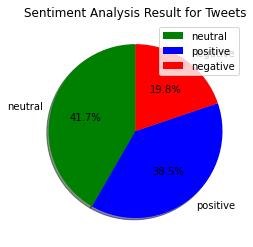

In [29]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
pichart['Percentage(%)'] = pichart['Percentage(%)'].str.replace('%', '')
size=pichart["Percentage(%)"]
  
# Create a circle for the center of the plot
my_circle=plt.Circle( (1,2), 0.67, color='white')
plt.title("Sentiment Analysis Result for Tweets" )
plt.pie(size, labels=names, colors=['green','blue','red'], autopct='%1.1f%%', shadow=True, startangle=90)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

In [30]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopword,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

In [31]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

Word Cloud Saved Successfully


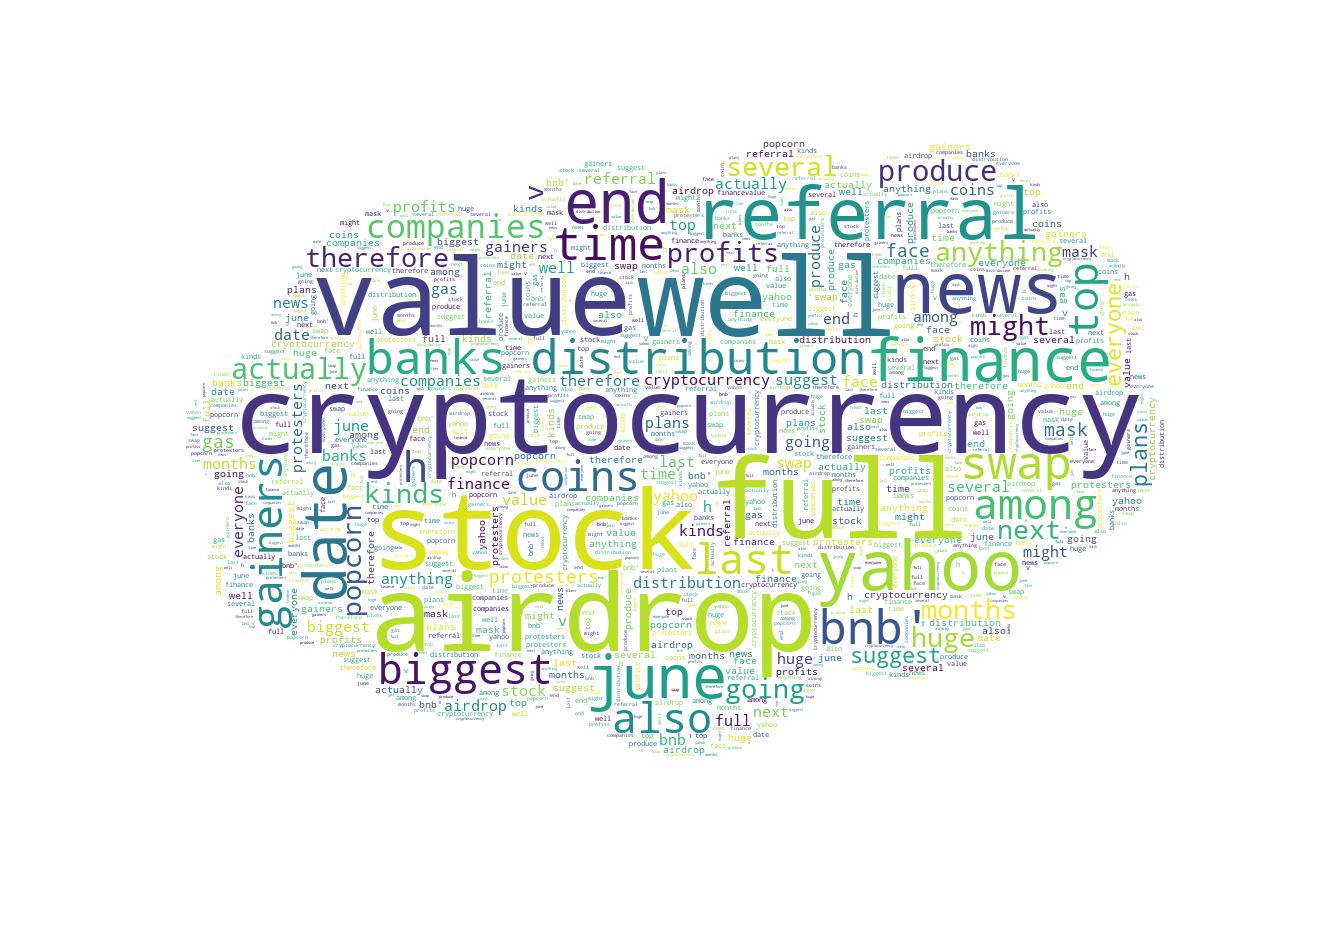

In [32]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["CleanedText"].values)

Word Cloud Saved Successfully


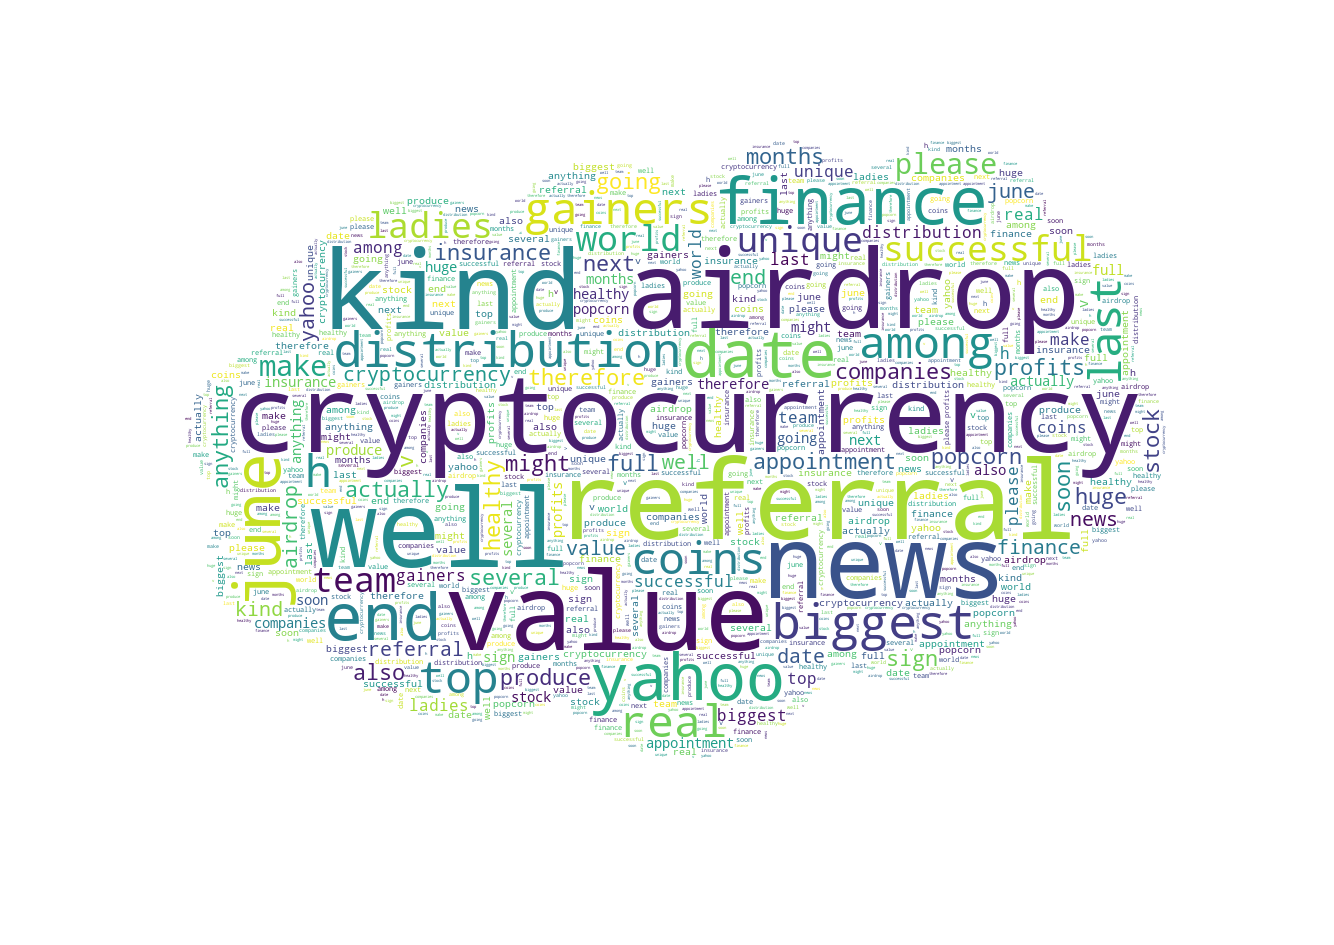

In [33]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["CleanedText"].values)

Word Cloud Saved Successfully


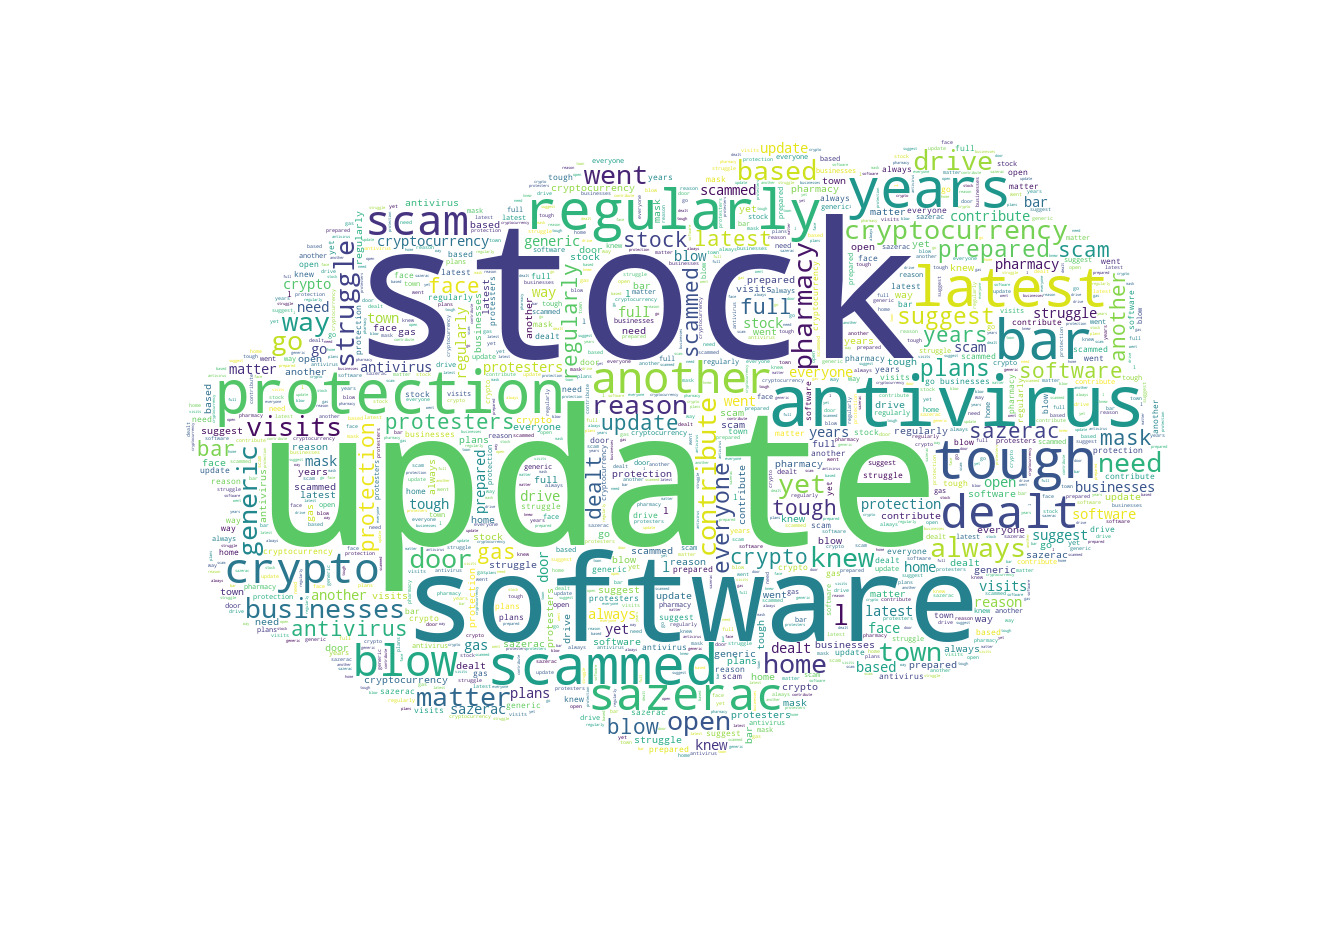

In [34]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["CleanedText"].values)

Word Cloud Saved Successfully


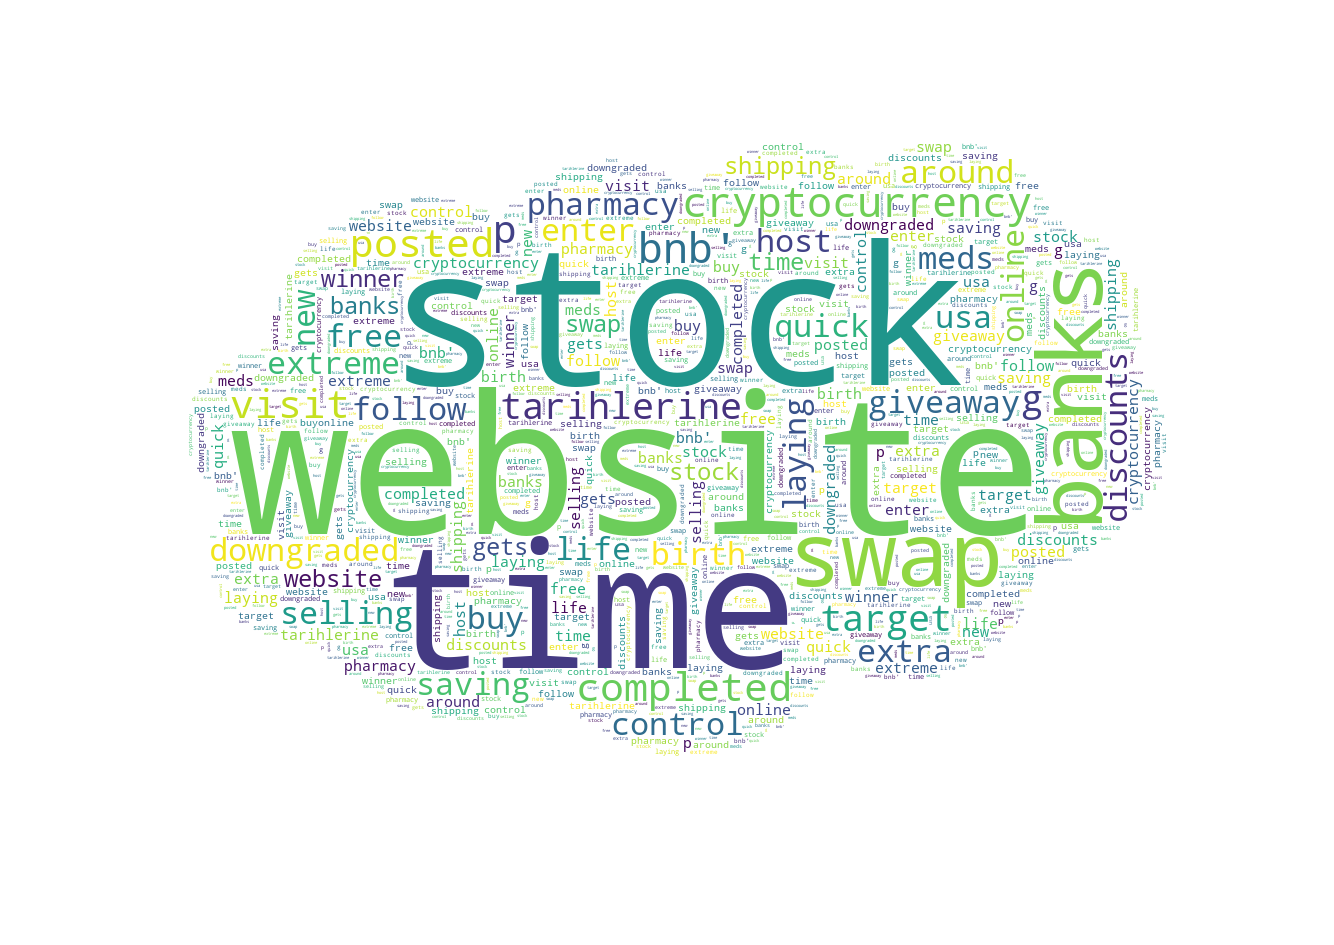

In [35]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["CleanedText"].values)

In [36]:
#Appliyng Stemmer
# ps = nltk.PorterStemmer()

# def stemming(text):
#     text = [ps.stem(word) for word in text]
#     return text

# tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))
# tw_list.head()

# TF - IDF (Term Frequency - Inverse Data Frequency)

It is a method of extracting the features from the text data. Used to find related content and important words and phrase in a larger text.

Term Frequency (tf): gives us the frequency of the word in each document in the corpus. It is the ratio of number of times the word appears in a document compared to the total number of words in that document. It increases as the number of occurrences of that word within the document increases. Each document has its own tf.



In [58]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [59]:
tw = tw_list["Lemma"]
countVectorizer = CountVectorizer()
countVectorizer.fit(tw)

CountVectorizer()

In [60]:
cvec_counts = countVectorizer.transform(tw)
cvec_counts

<8926x4748 sparse matrix of type '<class 'numpy.int64'>'
	with 65879 stored elements in Compressed Sparse Row format>

In [61]:
vectorizer = TfidfVectorizer()

In [62]:
Lemma = vectorizer.fit_transform(tw)
Lemma.shape

(8926, 4748)

In [63]:
dfOfCountVectorizer = pd.DataFrame(cvec_counts.todense(), columns=vectorizer.get_feature_names()) # todense() will return the matrix.
dfOfCountVectorizer

C:\Users\hiral\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ability,able,abortion,abrupt,absence,absolute,absolutely,abusive,academy,accelerate,...,youtube,zero,zinc,zip,zipper,zodiac,zomato,zone,zoo,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8921,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8922,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8923,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8924,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
x_train, x_test, y_train, y_test = train_test_split(Lemma, tw_list['sentiment_weight'], 
                                                    test_size = 0.3, random_state = 7)

In [66]:
print(" Shape of x_train is : ", x_train.shape)
print(" Shape of x_test is : ", x_test.shape)
print(" Shape of y_train is : ", y_train.shape)
print(" Shape of y_test is : ", y_test.shape)

 Shape of x_train is :  (6248, 4748)
 Shape of x_test is :  (2678, 4748)
 Shape of y_train is :  (6248,)
 Shape of y_test is :  (2678,)


# SVM(Support Vector Machine)

It gives greater accuracy by automatically avoiding overfitting of the data

In [67]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [68]:
svc_model = SVC()
svc_model.fit(x_train, y_train)
svc_pred = svc_model.predict(x_test)
svc_accuracy = accuracy_score(y_test, svc_pred) * 100
svc_accuracy

86.51979088872292

# KNN

The algorithm can be used to solve both classification and regression problem statements. The number of nearest neighbours to a new unknown variable that has to be predicted or classified is denoted by the symbol 'K'.

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [119]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_pred) *100
knn_accuracy

77.5578790141897

# Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rnd = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=50)
rnd

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, random_state=50)

In [120]:
rnd.fit(x_train, y_train)
rnd_pred = rnd.predict(x_test)
rnd_accuracy = accuracy_score(y_test, rnd_pred) *100
rnd_accuracy

67.40104555638537

# Naive Bayes Classifier

Naive Bayes (NB) which can provide accurate results without much training data


Texts have to be transformed into vectors before classification.

Those numbers will help the algorithm decide whether the vector representation of a text belongs to a category or not. 

In [74]:
from sklearn import model_selection, naive_bayes

In [121]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(x_train, y_train)

nb_pred = Naive.predict(x_test)
nb_pred

nb_accuracy = accuracy_score(nb_pred, y_test)*100
nb_accuracy

81.1799850634802

# Comparison of different models

In [122]:
all_algo = ['KNN','SVM', 'Random Forest', 'Naive Bayes']
all_accuracy = [round(svc_accuracy, 2), round(knn_accuracy, 2), round(rnd_accuracy, 2), round(nb_accuracy, 2)]
all_compare = pd.DataFrame({'Models ' : all_algo, 'Accuracy ' : all_accuracy}, index = [i for i in range(1, 5)])
all_compare

,Models,Accuracy
1,KNN,86.52
2,SVM,77.56
3,Random Forest,67.40
4,Naive Bayes,81.18


In [123]:
all_compare.style.bar(subset=['Accuracy '], color='#bfe8ae')

,Models,Accuracy
1,KNN,86.520000
2,SVM,77.560000
3,Random Forest,67.400000
4,Naive Bayes,81.180000


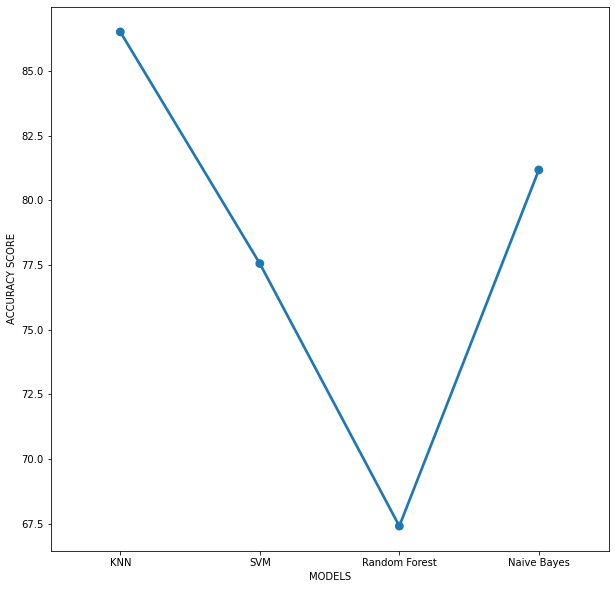

In [100]:
# Import Seaborn libary
import seaborn as sns

plt.figure(figsize = (10, 10))
sns.pointplot(x = all_compare["Models "], y = all_compare["Accuracy "], data = all_compare)
plt.xlabel('MODELS')
plt.ylabel('ACCURACY SCORE')
plt.show()